### Load Data

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath(__name__))))

'/Users/xianhaoliu/Library/CloudStorage/OneDrive-Stibo/Project/ISWS/ISWS-RP'

In [4]:
root_dir = os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath(__name__))))
config = {
    "folder": os.path.join(root_dir, "output"),
    "out_dir": os.path.join(root_dir, "new_charts"),
    "time": "2025-09-22_00-41",
    "llms": None
}   
folder = config.get("folder", os.path.join(root_dir, "output"))
out_dir = config.get("out_dir", os.path.join(root_dir, "new_charts"))
time = config.get("time", "2025-09-22_00-41")
llms = config.get("llms", None)
if llms is None:
    llms = ['gpt-4.1-nano-2025-04-14', 'gpt-5-nano', 'gpt-4.1-mini-2025-04-14', 'gpt-5-mini', 
        'grok-3-mini', 'llama3.1:8b', 'gpt-oss:20b', 
        'llama3.1:70b', 'gemini-2.0-flash', 'gemini-2.5-flash', 
        'gpt-4.1-2025-04-14', 'gpt-4o', 'gemini-2.5-pro', 'deepseek-chat', 'deepseek-reasoner', 'o3', 'gpt-5']# For 6 matrices -> 2x3

actions = ["fixing","classification","wikidata"]
predicates = ["?A1=A2","?A1>A3","?A1>A4","?A1=A3+A4","?A3∅A4","?A4=A1|3"]
columns=["p(A1=A2)", "p(A1=A3+A4)", "p(A1>A3)", "p(A1>A4)", "p(A3∅A4)", "p(A4=A1|3)"]

df_summery = pd.read_csv(f"{folder}/summary.csv")
df_summery

,dataset,action,llm,?A1=A2,?A1=A3+A4,?A1>A3,?A1>A4,?A3∅A4,?A4=A1|3,?A1=A1*,...,?A1=A3+A4(+),?A1=A3+A4(-),J(1-34)+,J(1-34)-,p(A1=A2),p(A1=A3+A4),p(A1>A3),p(A1>A4),p(A3∅A4),p(A4=A1|3)
0,lc-quad,classification,deepseek-chat,0.9000,0.8400,1.0000,0.9133,0.5800,0.4733,0.4400,...,0.857143,0.839161,0.964286,0.918315,0.0,0.0,0.0,0.0,0.0883,0.0
1,lc-quad,classification,deepseek-reasoner,0.6333,0.5933,1.0000,0.6933,0.8133,0.4867,0.3400,...,0.605634,0.375000,0.753264,0.731975,0.0,0.0,0.0,0.0,0.8316,0.0
2,lc-quad,classification,gemini-2.0-flash,0.9267,0.8000,1.0000,0.9467,0.8267,0.6667,0.3067,...,0.729167,0.833333,0.905017,0.944538,0.0,0.0,0.0,0.0,0.0016,0.0
3,lc-quad,classification,gemini-2.5-flash,0.9067,0.9400,1.0000,0.9533,0.9267,0.8933,0.2267,...,0.958333,0.500000,0.963165,0.816550,0.0,0.0,0.0,0.0,0.0539,0.0
4,lc-quad,classification,gemini-2.5-pro,0.9400,0.9000,1.0000,0.9667,0.9533,0.8667,0.3067,...,0.904762,0.666667,0.970793,0.983333,0.0,0.0,0.0,0.0,0.0030,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,overall,zero-shot,grok-3-mini,0.3433,0.2633,0.5250,0.4433,0.8783,0.2317,NaN,...,0.268836,0.062500,0.580653,0.296287,1.0,1.0,1.0,1.0,1.0000,1.0
342,overall,zero-shot,llama3.1:70b,0.2050,0.0700,0.2917,0.2433,0.7167,0.0317,NaN,...,0.067682,0.222222,0.352143,0.473900,1.0,1.0,1.0,1.0,1.0000,1.0
343,overall,zero-shot,llama3.1:8b,0.0167,0.0017,0.0383,0.0217,0.8433,0.0000,0.0133,...,0.000000,0.001718,0.158817,0.115033,1.0,1.0,1.0,1.0,1.0000,1.0
344,overall,zero-shot,mistral-small:24b,0.4433,0.2400,0.5067,0.4500,0.5100,0.0150,0.5133,...,0.295775,0.232514,0.564515,0.513060,1.0,1.0,1.0,1.0,1.0000,1.0


In [6]:
df_relation = pd.read_csv(f"{folder}/relation_summery.csv")
df_relation

,llm,dataset,relation,True,Accuracy,Size,Equivalence,Contains,ContainedBy,Overlap,Disjoint,Unknown,Else
0,deepseek-chat,lc-quad,R(1-2),Equivalence,0.9267(139),150,0.9267(139),0.0000(0),0.0000(0),0.0600(9),0.0000(0),0.0133(2),0.0000(0)
1,deepseek-chat,lc-quad,R(1-3),Contains,0.3200(48),150,0.0000(0),0.3200(48),0.6000(90),0.0533(8),0.0267(4),0.0000(0),0.0000(0)
2,deepseek-chat,lc-quad,R(1-4),Contains,0.2067(31),150,0.0067(1),0.2067(31),0.0867(13),0.5333(80),0.1667(25),0.0000(0),0.0000(0)
3,deepseek-chat,lc-quad,R(3-4),Disjoint,0.9867(148),150,0.0000(0),0.0000(0),0.0067(1),0.0067(1),0.9867(148),0.0000(0),0.0000(0)
4,deepseek-chat,lc-quad,R(1-34),Equivalence,0.8800(132),150,0.8800(132),0.0133(2),0.0067(1),0.0200(3),0.0800(12),0.0000(0),0.0000(0)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,o3,overall,R(1-2),Equivalence,0.9283(557),600,0.9283(557),0.0317(19),0.0283(17),0.0017(1),0.0017(1),0.0083(5),0.0000(0)
446,o3,overall,R(1-3),Contains,0.9717(583),600,0.0117(7),0.9717(583),0.0050(3),0.0017(1),0.0017(1),0.0083(5),0.0000(0)
447,o3,overall,R(1-4),Contains,0.9767(586),600,0.0100(6),0.9767(586),0.0000(0),0.0033(2),0.0067(4),0.0033(2),0.0000(0)
448,o3,overall,R(3-4),Disjoint,0.9517(571),600,0.0033(2),0.0117(7),0.0033(2),0.0150(9),0.9517(571),0.0150(9),0.0000(0)


In [7]:
df_p_value = pd.read_csv(f"{folder}/p_value_matrices.csv")
df_p_value

,action,dataset,predicate,llm,llama3.1:8b,gpt-oss:20b,gpt-4.1-nano-2025-04-14,mistral-small:24b,llama3.1:70b,gemini-2.0-flash,...,gpt-4o,gpt-4.1-2025-04-14,deepseek-chat,gemini-2.5-flash,gpt-5-nano,deepseek-reasoner,gemini-2.5-pro,gpt-5-mini,o3,gpt-5
0,classification,lc-quad,?A1=A2,llama3.1:8b,1.0,1.0000,1.0000,1.0000,1.0000,1.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,classification,lc-quad,?A1=A2,gpt-oss:20b,0.0,1.0000,1.0000,0.9993,0.9663,1.0000,...,1.0000,1.0000,1.0000,1.0000,0.9865,0.1712,1.0000,1.0000,0.9912,1.0000
2,classification,lc-quad,?A1=A2,gpt-4.1-nano-2025-04-14,0.0,0.0000,1.0000,0.0000,0.0000,0.0112,...,0.6875,0.0112,0.0012,0.0021,0.0000,0.0000,0.0327,0.0004,0.0000,0.0898
3,classification,lc-quad,?A1=A2,mistral-small:24b,0.0,0.0019,1.0000,1.0000,0.1400,0.9955,...,1.0000,0.9974,0.9855,0.9927,0.2354,0.0000,0.9993,0.9449,0.2612,0.9998
4,classification,lc-quad,?A1=A2,llama3.1:70b,0.0,0.0587,1.0000,0.9179,1.0000,0.9999,...,1.0000,0.9999,0.9989,0.9993,0.6641,0.0041,1.0000,0.9960,0.7084,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,zero-shot,synthetic,?A4=A1|3,deepseek-reasoner,0.0,0.5000,0.0005,0.0000,0.0002,0.0121,...,0.0047,0.4225,0.0925,1.0000,0.9996,1.0000,0.9998,0.8852,0.9786,1.0000
2156,zero-shot,synthetic,?A4=A1|3,gemini-2.5-pro,0.0,0.0008,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0003,0.0000,0.6494,0.5679,0.0007,1.0000,0.0144,0.0877,0.8519
2157,zero-shot,synthetic,?A4=A1|3,gpt-5-mini,0.0,0.1537,0.0000,0.0000,0.0000,0.0011,...,0.0003,0.1405,0.0147,0.9977,0.9981,0.2122,0.9943,1.0000,0.8595,0.9999
2158,zero-shot,synthetic,?A4=A1|3,o3,0.0,0.0354,0.0000,0.0000,0.0000,0.0001,...,0.0000,0.0326,0.0020,0.9597,0.9506,0.0494,0.9552,0.2366,1.0000,0.9955


# P-values

### pairwise

In [319]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # if you prefer pure Matplotlib, see the alt. plotter below

# ---------- 1) Load & prepare -------------------------------------------------

def load_pvalue_frame(csv_file: str) -> pd.DataFrame:
    """Read CSV and return a DataFrame."""
    return pd.read_csv(csv_file)

def get_llm_columns(df: pd.DataFrame, exclude_llms=None) -> list[str]:
    """
    Identify LLM columns (everything after 'llm') and optionally exclude some.
    Returns the list of column names used as heatmap columns.
    """
    cols = df.columns.tolist()
    start = cols.index("llm") + 1
    llm_cols = cols[start:]
    if exclude_llms:
        llm_cols = [c for c in llm_cols if c not in exclude_llms]
    return llm_cols

def filter_llms(df: pd.DataFrame, exclude_llms=None) -> pd.DataFrame:
    """Drop rows (LLMs) the user wants to exclude."""
    if exclude_llms:
        return df[~df["llm"].isin(exclude_llms)].copy()
    return df

# ---------- 2) Build matrix per group ----------------------------------------

def build_square_matrix(subset: pd.DataFrame, llm_cols: list[str]) -> pd.DataFrame:
    """
    Rows = 'llm', Cols = llm_cols. Coerce to numeric.
    """
    mat = subset.set_index("llm")[llm_cols].copy()
    mat = mat.apply(pd.to_numeric, errors="coerce")
    return mat


# ---------- 3) Plot a single heatmap (seaborn) -------------------------------

def plot_single_heatmap(
    mat: pd.DataFrame,
    mask: pd.DataFrame,
    annot: pd.DataFrame,
    title: str,
    cmap: str = "Reds_r",
    alpha: float = 0.05,
    figsize: tuple[float, float] | None = None,
):
    """
    Create one heatmap figure and return (fig, ax).
    Only p <= alpha are colored (vmax=alpha), with [0, alpha] mapped to colormap.
    """
    if figsize is None:
        figsize = (max(6, 0.8 * mat.shape[1]), max(6, 0.8 * mat.shape[0]))

    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(
        mat,
        mask=mask,
        annot=annot,
        fmt="",
        cmap=cmap,
        vmin=0.0, vmax=alpha,
        cbar_kws={"label": f"p-value (only p ≤ {alpha:g} shown)"},
        linewidths=0.5, linecolor="lightgray",
        ax=ax,
    )
    ax.set_title(title, fontsize=10)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    fig.tight_layout()
    return fig, ax


# ---------- 4) Save helper ----------------------------------------------------

def save_figure(fig, out_dir: str, predicate: str, dataset: str, action: str) -> str:
    """Save figure under out_dir/predicate/dataset_action_pvalues.png and return path."""
    pred_dir = os.path.join(out_dir, predicate)
    os.makedirs(pred_dir, exist_ok=True)
    fname = f"{dataset}_{action}_pvalues.png".replace(" ", "_")
    fpath = os.path.join(pred_dir, fname)
    fig.savefig(fpath, dpi=300)
    plt.close(fig)
    return fpath

# ---------- 5) Orchestrator ---------------------------------------------------

def plot_square_heatmaps(
    csv_file: str,
    out_dir: str = "heatmaps",
    cmap: str = "Reds_r",
    exclude_llms: list[str] | None = None,
    alpha: float = 0.05,
    use_matplotlib_only: bool = False,
) -> list[str]:
    """
    High-level: reads CSV, groups by (predicate, dataset, action),
    builds each matrix, plots, and saves. Returns list of saved file paths.
    """
    df = load_pvalue_frame(csv_file)
    df = filter_llms(df, exclude_llms)
    llm_cols = get_llm_columns(df, exclude_llms)

    os.makedirs(out_dir, exist_ok=True)
    saved = []

    for (predicate, dataset, action), subset in df.groupby(["predicate", "dataset", "action"]):
        if subset.empty:
            continue

        mat = build_square_matrix(subset, llm_cols)
        mask, annot = make_mask_and_annotations(mat, alpha=alpha)

        # Skip if nothing significant
        if (~mask).to_numpy().sum() == 0:
            print(f"Skipping {predicate} | {dataset} | {action}: no significant values.")
            continue

        title = f"{predicate} | {dataset} | {action}"
        if use_matplotlib_only:
            fig, _ = plot_single_heatmap_matplotlib(
                mat, mask, annot, title=title, alpha=alpha
            )
        else:
            fig, _ = plot_single_heatmap(
                mat, mask, annot, title=title, cmap=cmap, alpha=alpha
            )

        fpath = save_figure(fig, out_dir, predicate, dataset, action)
        print(f"Saved: {fpath}")
        saved.append(fpath)

    return saved


In [ ]:
def make_mask_and_annotations(
    mat: pd.DataFrame,
    alpha: float = 0.05,
    tiny: float =1-alpha,
) -> tuple[pd.DataFrame, pd.DataFrame]:
    """
    Mask: True where not significant or NaN.
    Annot: "" for masked; '≈0' for very small; else value with 3 decimals.
    """
    mask = (mat < alpha) | mat.isna()
    annot = mat.copy()

    for r in annot.index:
        for c in annot.columns:
            v = annot.loc[r, c]
            if pd.isna(v) or v > alpha:
                annot.loc[r, c] = ""
            elif v <= tiny:
                annot.loc[r, c] = ""
            else:
                annot.loc[r, c] = f"{v:.3f}"
    return mask, annot


def plot_single_heatmap_matplotlib(mat, mask, annot, title, alpha=0.05, figsize=None):
    import numpy as np
    import matplotlib.pyplot as plt

    data = mat.copy()
    data[mask] = np.nan

    if figsize is None:
        figsize = (max(6, 0.8 * data.shape[1]), max(6, 0.8 * data.shape[0]))

    fig, ax = plt.subplots(figsize=figsize)
    # make cells square
    n, m = data.shape
    try:
        ax.set_box_aspect(n / m)
    except Exception:
        ax.set_aspect("equal", adjustable="box")

    # single colorbar
    im = ax.imshow(data, vmin=0.0, vmax=1.0, cmap="Reds", interpolation="nearest")
    cbar = plt.colorbar(im, ax=ax, shrink=0.5)  # shrink to 70% of default height
    cbar.set_label("(1-p) value (0 → low, 1 → high)")

    # ticks & labels
    ax.set_xticks(range(m)); ax.set_yticks(range(n))
    ax.set_xticklabels(list(data.columns), rotation=90)
    ax.set_yticklabels(list(data.index))
    ax.set_title(title, fontsize=10)

    ax.grid(False)

    # (optional) draw a thin border exactly once per cell
    # comment these out if you want no borders at all
    for x in range(m + 1):
        ax.axvline(x - 0.5, color="lightgray", linewidth=0.5)
    for y in range(n + 1):
        ax.axhline(y - 0.5, color="lightgray", linewidth=0.5)

    # annotations
    for i in range(n):
        for j in range(m):
            txt = annot.iloc[i, j]
            if txt != "":
                ax.text(j, i, txt, ha="center", va="center", fontweight="bold")

    fig.tight_layout()
    return fig, ax


/var/folders/pp/f9hxx2kn0vbfmjhhcspmjlt40000gq/T/ipykernel_51808/3657761697.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annot.loc[r, c] = ""
/var/folders/pp/f9hxx2kn0vbfmjhhcspmjlt40000gq/T/ipykernel_51808/3657761697.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annot.loc[r, c] = ""
/var/folders/pp/f9hxx2kn0vbfmjhhcspmjlt40000gq/T/ipykernel_51808/3657761697.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annot.loc[r, c] = ""
/var/folders/pp/f9hxx2

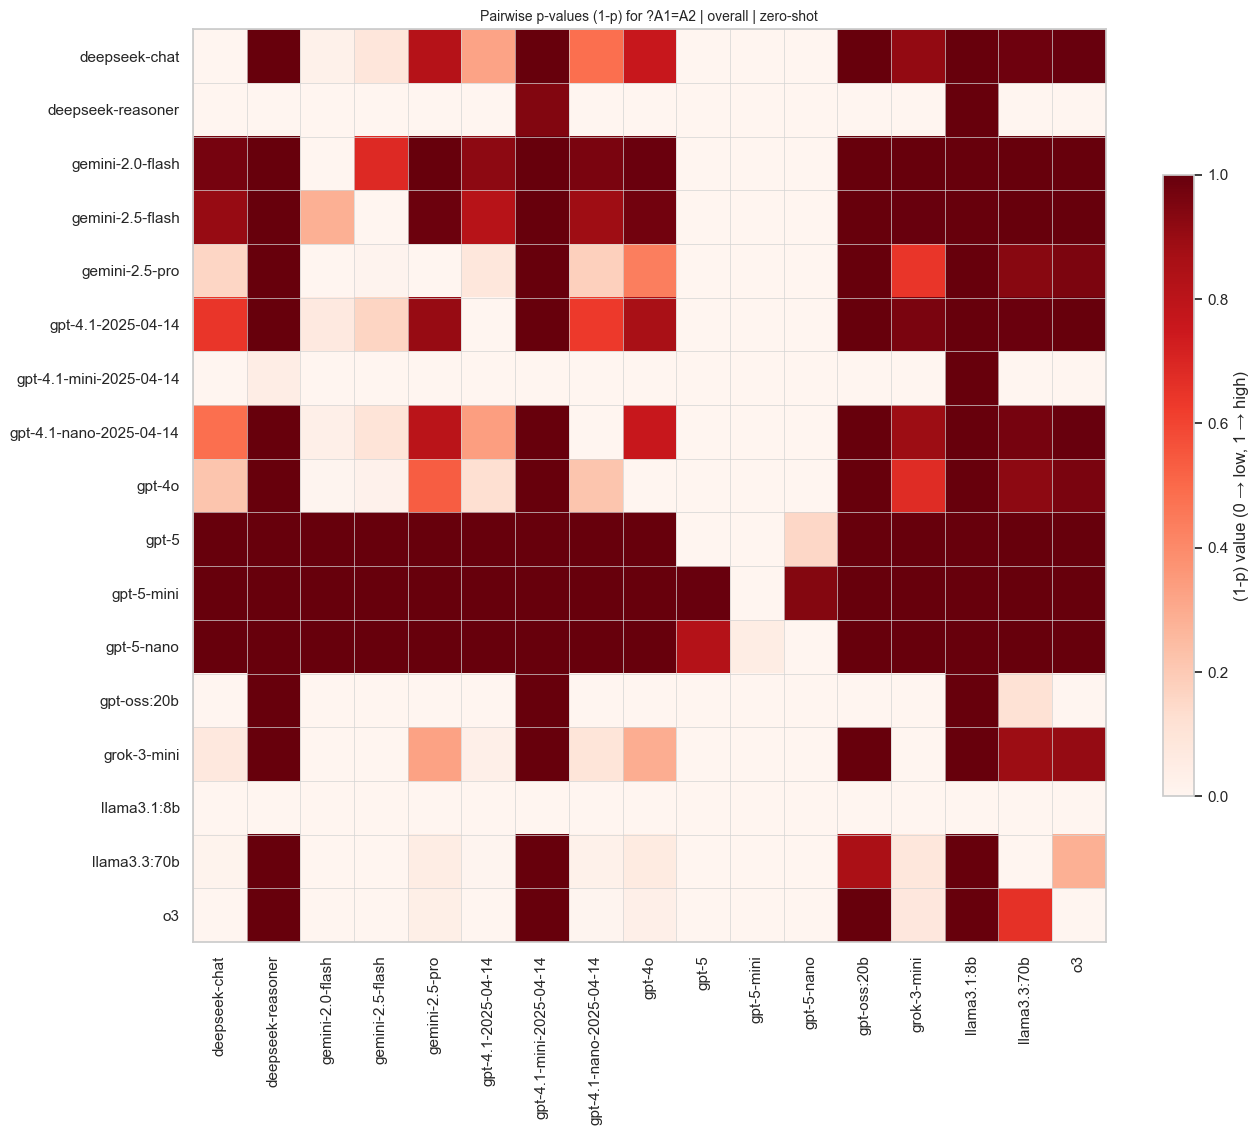

In [104]:
# Example
action = "zero-shot"
dataset = "overall"
predicate = "?A1=A2"

p_matrix = df_p_value[(df_p_value["action"]==action)& (df_p_value["dataset"]==dataset) & (df_p_value["predicate"]==predicate)].drop(columns=["action", "dataset", "predicate"])
llm_names = p_matrix['llm'].to_list()
# mat = p_matrix.set_index('llm').reindex(index=llm_names, columns=llm_names).values
mat = p_matrix.set_index('llm')[llm_names]
mat = 1-mat

alpha = 0.05
mask, annot = make_mask_and_annotations(mat, alpha=alpha)

n, m = mat.shape

fig, ax = plot_single_heatmap_matplotlib(
    mat=mat,
    mask=mask,
    annot=annot,
    title=f"Pairwise p-values (1-p) for {predicate} | {dataset} | {action}",
    alpha=alpha
)
ax.set_box_aspect(n / m)  
ax.set_aspect('equal', adjustable='box')

plt.show()

In [ ]:
def build_square_matrix_for_pred(df, action, dataset, predicate, llms):
    # Filter rows
    sub = df[(df["action"] == action) &
             (df["dataset"] == dataset) &
             (df["predicate"] == predicate)].copy()

    # Coerce numeric on LLM columns
    value_cols = [c for c in sub.columns if c not in ("action", "dataset", "predicate", "llm")]
    sub[value_cols] = sub[value_cols].apply(pd.to_numeric, errors="coerce")

    # Base square matrix
    mat = sub.set_index("llm")[value_cols]

    # Keep only columns that are in llms, then reindex rows/cols to your given order
    cols_in = [c for c in llms if c in mat.columns]
    mat = mat[cols_in]
    mat = mat.reindex(index=llms, columns=llms)  # <-- rank/order by your `llms` list
    return mat

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.colors import Normalize

def plot_heatmap_panel_2xN(
    mats: list[pd.DataFrame],          # 4 or 6 square DataFrames (same LLM order)
    titles: list[str],                 # same length as mats
    llm_names: list[str],              # order used for rows/cols
    show_confidence: bool = False,     # if True, plot 1 - p (confidence)
    cmap: str = "Reds",
    tick_fs: int = 14,                 # bigger tick font
    title_fs: int = 14,                # bigger title font
    wspace: float = 0.05,              # wider col spacing
    hspace: float = 0.15,              # wider row spacing
    cell_in: float = 0.34,             # inches per cell side (scales figure size)
    low_thr: float = 0.05,
    high_thr: float = 0.95,
    under_color: str = "white",
    over_color: str = "black",   # None -> use cmap's deepest red
):
    """
    2x2 or 2x3 heatmaps with a centered horizontal colorbar and a two-line legend below it.
    """
    # Thresholded normalization: show white < low_thr, deepest red > high_thr
    norm = Normalize(vmin=low_thr, vmax=high_thr)

    cmap_obj = plt.get_cmap(cmap).copy()
    cmap_obj.set_under(under_color)
    cmap_obj.set_over(cmap_obj(1.0) if over_color is None else over_color)
    # ---- Validate inputs
    k = len(mats)
    assert k in (4, 6), "Provide exactly 4 or 6 matrices."
    assert len(titles) == k, "titles must match mats length."
    n = len(llm_names)

    # Reindex each matrix to the provided llm_names order and choose what to plot
    mats = [M.reindex(index=llm_names, columns=llm_names) for M in mats]
    datas = [(1.0 - M) if show_confidence else M for M in mats]
    masks = [D.isna() for D in datas]

    heat_cols = 2 if k == 4 else 3   # 2x2 or 2x3
    if k == 4:
        tick_fs -= 2
        title_fs -= 2

    # ---- Figure size: scale with matrix dimension and number of heatmaps
    per_subplot = max(6.5, n * cell_in)
    fig_w = per_subplot * heat_cols
    fig_h = per_subplot * 2 + 1.0    # extra for cbar + legend row
    fig = plt.figure(figsize=(fig_w, fig_h))

    # ---- Grid: add 2 extra rows: one for colorbar, one for legend
    # height ratios: [row1, row2, cbar, legend]
    gs = GridSpec(4, heat_cols,
                  figure=fig,
                  height_ratios=[1, 1, 0.06, 0.11],
                  wspace=wspace, hspace=hspace)

    axes, ims = [], []
    # norm = Normalize(vmin=0.0, vmax=1.0)

    for i in range(k):
        r = i // heat_cols
        c = i % heat_cols
        ax = fig.add_subplot(gs[r, c])
        axes.append(ax)

        D = datas[i].copy()
        D[masks[i]] = np.nan

        # im = ax.imshow(D, norm=norm, cmap=cmap, interpolation="nearest")
        im = ax.imshow(D, norm=norm, cmap=cmap_obj, interpolation="nearest")
        ims.append(im)

        # Square cells
        try:
            ax.set_box_aspect(1.0)
        except Exception:
            ax.set_aspect("equal", adjustable="box")

        # Ticks at every index; show labels only bottom row / left column
        ax.set_xticks(range(n)); ax.set_yticks(range(n))

        if r == 1:  # bottom row
            ax.set_xticklabels([i for i in range(n)], rotation=90, fontsize=tick_fs)
        else:
            ax.set_xticklabels([])

        if c == 0:  # left column
            ax.set_yticklabels([i for i in range(n)], fontsize=tick_fs)
        else:
            ax.set_yticklabels([])

        ax.set_title(titles[i], fontsize=title_fs, pad=3)
        ax.grid(False)

        # thin borders (optional)
        for x in range(n + 1):
            ax.axvline(x - 0.5, color="lightgray", linewidth=0.4)
        for y in range(n + 1):
            ax.axhline(y - 0.5, color="lightgray", linewidth=0.4)

    # ---- Colorbar centered under heatmaps (spans all heatmap columns)
    cax = fig.add_subplot(gs[2, :])
    # cbar = fig.colorbar(ims[0], cax=cax, orientation="horizontal")
    cbar = fig.colorbar(ims[0], cax=cax, orientation="horizontal", extend="both")
    cbar.set_label("Confidence (1 − p)" if show_confidence else "p-value (0 → low, 1 → high)",
                fontsize=tick_fs, labelpad=2)
    # cbar.ax.tick_params(labelsize=tick_fs, length=3)

    cbar.ax.xaxis.set_label_position('bottom')             # move label to top
    cbar.ax.xaxis.set_ticks_position('bottom')          # keep ticks at bottom
    cbar.ax.tick_params(axis='x', labelsize=tick_fs - 4, labelbottom=True,     # show only bottom tick labels
                        labeltop=False, length=3)
    cbar.set_ticks(np.linspace(low_thr, high_thr, 5))
    # ---- Two-line index→LLM legend directly under the colorbar
    legend_ax = fig.add_subplot(gs[3, :])
    legend_ax.axis("off")

    # split into two lines (0–9, 10–end) with correct indices
    line1 = " | ".join(f"{i:>2}: {name}" for i, name in enumerate(llm_names[:6]))
    line2 = " | ".join(f"{i:>2}: {name}" for i, name in enumerate(llm_names[6:12], start=6))
    line3 = " | ".join(f"{i:>2}: {name}" for i, name in enumerate(llm_names[12:], start=12))

    legend_ax.text(0.5, 0.8, line1, ha="center", va="center",
                   family="monospace", fontsize=tick_fs)
    legend_ax.text(0.5, 0.4, line2, ha="center", va="center",
                   family="monospace", fontsize=tick_fs)
    legend_ax.text(0.5, 0, line3, ha="center", va="center",
                   family="monospace", fontsize=tick_fs)

    # tighter outer margins so plots fill the canvas
    fig.subplots_adjust(left=0.06, right=0.985, top=0.96, bottom=0.04)
    return fig, axes


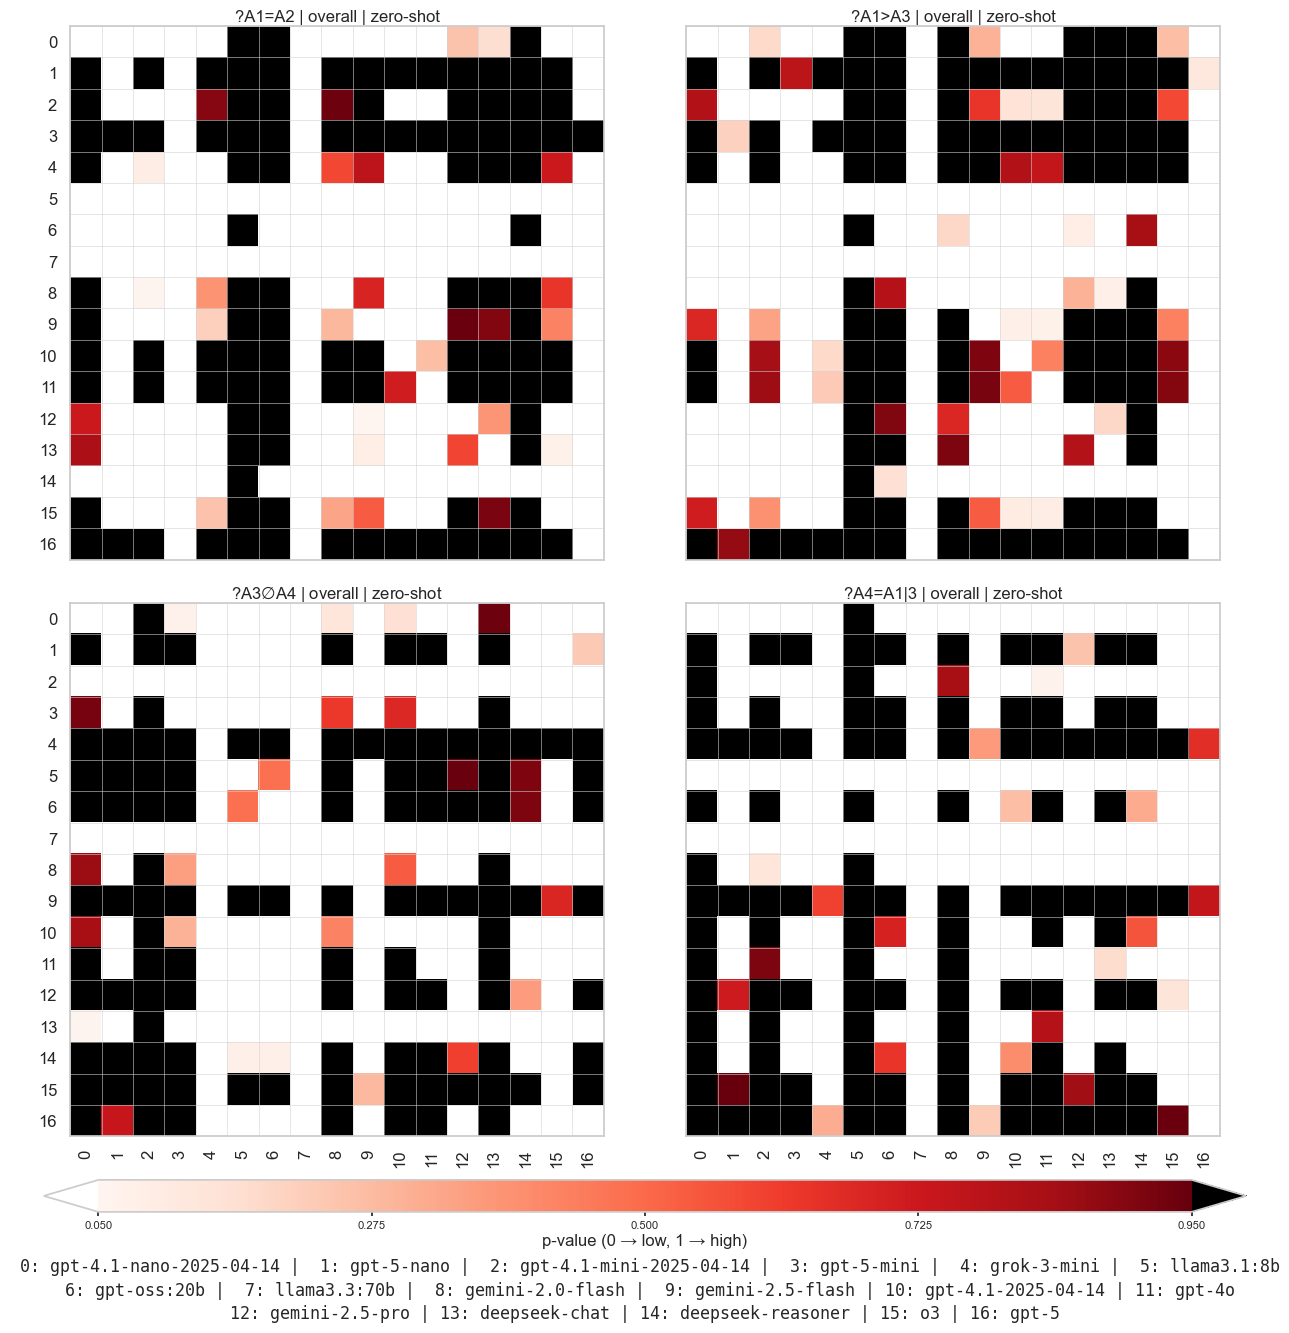

In [430]:
llms = ['gpt-4.1-nano-2025-04-14', 'gpt-5-nano', 'gpt-4.1-mini-2025-04-14', 'gpt-5-mini', 
        'grok-3-mini', 'llama3.1:8b', 'gpt-oss:20b', 
        'llama3.3:70b', 'gemini-2.0-flash', 'gemini-2.5-flash', 
        'gpt-4.1-2025-04-14', 'gpt-4o', 'gemini-2.5-pro', 'deepseek-chat', 'deepseek-reasoner', 'o3', 'gpt-5']# For 6 matrices -> 2x3


predicates = ["?A1=A2","?A1>A3", "?A1>A4", "?A1=A3+A4", "?A3∅A4", "?A4=A1|3"]
predicates = ["?A1=A2","?A1>A3", "?A3∅A4", "?A4=A1|3"]

action = "zero-shot"
dataset = "overall"

mats = [1 - build_square_matrix_for_pred(df_p_value, action, dataset, p, llms) for p in predicates]


def _latexify_emptyset(s: str) -> str:
    return s.replace("∅", r"$\emptyset$")  # or $\varnothing$

titles = [f"{_latexify_emptyset(p)} | {dataset} | {action}" for p in predicates]

fig, axes = plot_heatmap_panel_2xN(mats=mats, titles=titles, llm_names=llms)


In [253]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

def save_heatmap_panels_by_combo(
    df: pd.DataFrame,
    llms: list[str],
    predicates: list[str],
    out_dir: str = "panels",
    show_confidence: bool = True,    # plot 1 - p by default
    cmap: str = "Reds",
    dpi: int = 300,
    **panel_kwargs,                  # passed through to plot_heatmap_panel_2xN (e.g., low_thr=0.05, high_thr=0.95)
):
    """
    For each (action, dataset) in df, build 4/6 matrices (one per predicate) and save a 2xN panel.
    Expects df columns: ['action','dataset','predicate','llm', <LLM columns...>] with p-values.
    Returns list of saved file paths.
    """

    def _safe(s: str) -> str:
        return re.sub(r"[^a-zA-Z0-9._-]+", "_", str(s)).strip("_")

    def _latexify_emptyset(s: str) -> str:
        return s.replace("∅", r"$\emptyset$")

    def build_square_matrix_for_pred(df_in, action, dataset, predicate, llm_order):
        sub = df_in[(df_in["action"] == action) &
                    (df_in["dataset"] == dataset) &
                    (df_in["predicate"] == predicate)].copy()
        if sub.empty:
            return pd.DataFrame(index=llm_order, columns=llm_order, dtype=float)

        value_cols = [c for c in sub.columns if c not in ("action", "dataset", "predicate", "llm")]
        sub[value_cols] = sub[value_cols].apply(pd.to_numeric, errors="coerce")

        mat = sub.set_index("llm")[value_cols]
        # keep only requested LLMs/columns, then reindex to full order
        cols_in = [c for c in llm_order if c in mat.columns]
        mat = mat[cols_in]
        mat = mat.reindex(index=llm_order, columns=llm_order)
        return mat

    os.makedirs(out_dir, exist_ok=True)
    saved = []

    combos = df[["action", "dataset"]].drop_duplicates().itertuples(index=False, name=None)
    for action, dataset in combos:
        # build per-predicate matrices (RAW p-values)
        mats = [build_square_matrix_for_pred(df, action, dataset, p, llms) for p in predicates]

        # skip if all-NaN across all mats
        if all(m.isna().all().all() for m in mats):
            continue

        titles = [f"{_latexify_emptyset(p)} | {dataset} | {action}" for p in predicates]

        # plot (uses your existing plot_heatmap_panel_2xN)
        fig, _ = plot_heatmap_panel_2xN(
            mats=mats,
            titles=titles,
            llm_names=llms,
            show_confidence=show_confidence,
            cmap=cmap,
            **panel_kwargs
        )

        ds_dir = os.path.join(out_dir, _safe(dataset))
        os.makedirs(ds_dir, exist_ok=True)
        fname = f"{_safe(dataset)}__{_safe(action)}.png"
        fpath = os.path.join(ds_dir, fname)
        fig.savefig(fpath, dpi=dpi, bbox_inches="tight")
        plt.close(fig)
        saved.append(fpath)

    return saved


In [332]:
llms = ['gpt-4.1-nano-2025-04-14', 'gpt-5-nano', 'gpt-4.1-mini-2025-04-14', 'gpt-5-mini', 
        'grok-3-mini', 'llama3.1:8b', 'gpt-oss:20b', 
        'llama3.1:70b', 'gemini-2.0-flash', 'gemini-2.5-flash', 
        'gpt-4.1-2025-04-14', 'gpt-4o', 'gemini-2.5-pro', 'deepseek-chat', 'deepseek-reasoner', 'o3', 'gpt-5']# For 6 matrices -> 2x3


predicates = ["?A1=A2","?A1>A3","?A1>A4","?A1=A3+A4","?A3∅A4","?A4=A1|3"]
paths = save_heatmap_panels_by_combo(
    df=df_p_value,
    llms=llms,
    predicates=predicates,
    out_dir="../../new_charts/p_value_heatmap2X3",
    show_confidence=True,       # plot 1 - p
    cmap="Reds",
    low_thr=0.05, high_thr=0.95, over_color="black"  # if your plot function supports thresholds
)


In [333]:
predicates = ["?A1=A2","?A1>A3","?A3∅A4","?A4=A1|3"]
paths = save_heatmap_panels_by_combo(
    df=df_p_value,
    llms=llms,
    predicates=predicates,
    out_dir="../../new_charts/p_value_heatmap2X2",
    show_confidence=True,       # plot 1 - p
    cmap="Reds",
    low_thr=0.05, high_thr=0.95, over_color="black"  # if your plot function supports thresholds
)


### Actions

In [458]:
llms = ['gpt-4.1-nano-2025-04-14', 'gpt-5-nano', 'gpt-4.1-mini-2025-04-14', 'gpt-5-mini', 
        'grok-3-mini', 'llama3.1:8b', 'gpt-oss:20b', 
        'llama3.1:70b', 'gemini-2.0-flash', 'gemini-2.5-flash', 
        'gpt-4.1-2025-04-14', 'gpt-4o', 'gemini-2.5-pro', 'deepseek-chat', 'deepseek-reasoner', 'o3', 'gpt-5']# For 6 matrices -> 2x3


predicates = ["?A1=A2","?A1>A3","?A1>A4","?A1=A3+A4","?A3∅A4","?A4=A1|3"]
actions = ["fixing","classification","wikidata"]
columns=["p(A1=A2)", "p(A1=A3+A4)", "p(A1>A3)", "p(A1>A4)", "p(A3∅A4)", "p(A4=A1|3)"]

p_value_matrix = df_summery[["action", "dataset", "llm"] + columns]
p_value_matrix

,action,dataset,llm,p(A1=A2),p(A1=A3+A4),p(A1>A3),p(A1>A4),p(A3∅A4),p(A4=A1|3)
0,classification,qawiki,deepseek-chat,0.0000,0.0000,0.0000,0.0000,0.8313,0.0000
1,classification,qawiki,deepseek-reasoner,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000
2,classification,qawiki,gemini-2.0-flash,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000
3,classification,qawiki,gemini-2.5-flash,0.0000,0.0000,0.0000,0.0000,0.7388,0.0000
4,classification,qawiki,gemini-2.5-pro,0.0000,0.0000,0.0000,0.0000,0.0100,0.0000
...,...,...,...,...,...,...,...,...,...
261,zero-shot,overall,gpt-oss:20b,0.5220,0.5251,0.5183,0.5194,0.5255,0.5304
262,zero-shot,overall,grok-3-mini,0.5195,0.5211,0.5191,0.5191,0.5304,0.5215
263,zero-shot,overall,llama3.1:70b,0.5227,0.5363,0.5205,0.5210,0.5205,0.5469
264,zero-shot,overall,llama3.1:8b,0.5660,0.6875,0.5390,0.5456,0.5238,1.0000


In [459]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.colors import Normalize

def plot_heatmap_actions_1X2_vertical(
    p_value_matrix: pd.DataFrame,   # df with ['llm','action'] + columns (p-values)
    actions: list[str],             # exactly two, e.g. ["fixing","classification"]
    dataset: str,
    columns: list[str],             # predicate columns like ["p(A1=A2)", ...]
    llms: list[str],                # LLM order (x-axis)
    *,
    show_confidence: bool = True,  # True -> plot 1 - p
    cmap: str = "Reds",
    low_thr: float = 0.05,
    high_thr: float = 0.95,
    under_color: str = "white",     # < low_thr
    over_color: str = "black",      # > high_thr
    tick_fs: int = 11,
    title_fs: int = 14,
    cell_in: float = 0.34,          # inches per cell
    wspace: float = 0.20,           # gap between two plots
    cbar_height_ratio: float = 0.055  # shrink colorbar (row height ratio)
):
    if len(actions) != 2:
        raise ValueError("Provide exactly two actions.")

    # Ensure numeric
    sub = p_value_matrix[['llm','action'] + columns].copy()
    for c in columns:
        sub[c] = pd.to_numeric(sub[c], errors="coerce")

    # Build two matrices per action, then TRANSPOSE so:
    # rows = predicates (columns), cols = llms
    mats = []
    for act in actions:
        df_a = sub[sub['action'] == act][['llm'] + columns]
        mat = df_a.set_index('llm').reindex(index=llms, columns=columns).T  # transpose here
        mats.append(mat)

    # Display as p or 1-p
    disp = [(1.0 - M) if show_confidence else M for M in mats]

    n_rows = len(columns)   # predicates on y-axis
    n_cols = len(llms)      # llms on x-axis

    # Figure size to keep cells near-square
    sub_w = max(5.5, n_cols * cell_in)
    sub_h = max(4.8, n_rows * cell_in)
    fig_w = sub_w * 2 + 0.8
    fig_h = sub_h +0.5

    rc = {"text.usetex": False, "font.family": "DejaVu Sans", "mathtext.fontset": "dejavusans"}
    with plt.rc_context(rc):
        fig = plt.figure(figsize=(fig_w, fig_h))
        # 2 rows: (0) shrunken colorbar, (1) heatmaps
        gs = GridSpec(2, 2, figure=fig,
                      height_ratios=[cbar_height_ratio, 1.0],
                      wspace=wspace, hspace=0.10)

        # Thresholded normalization & cmap: bar shows only [low_thr, high_thr]
        norm = Normalize(vmin=low_thr, vmax=high_thr)
        base = plt.get_cmap(cmap)
        try:
            cmap_obj = base.with_extremes(under=under_color, over=over_color)
        except AttributeError:
            cmap_obj = base
            cmap_obj.set_under(under_color)
            cmap_obj.set_over(over_color)

        ims, axes = [], []
        for i, (act, M) in enumerate(zip(actions, disp)):
            ax = fig.add_subplot(gs[1, i])
            axes.append(ax)

            im = ax.imshow(M, norm=norm, cmap=cmap_obj, interpolation="nearest")
            ims.append(im)

            # Square cells: aspect = rows / cols (predicates / llms)
            try:
                ax.set_box_aspect(n_rows / n_cols)
            except Exception:
                ax.set_aspect('equal', adjustable='box')

            ax.set_xticks(range(n_cols))
            ax.set_yticks(range(n_rows))
            ax.set_xticklabels([i for i in range(n_cols)], rotation=0, fontsize=tick_fs)
            if i == 0:  # left column
                ax.set_yticklabels(columns, fontsize=tick_fs)
            else:
                ax.set_yticklabels([])

            # light borders
            for x in range(n_cols + 1):
                ax.axvline(x - 0.5, color="lightgray", linewidth=0.35)
            for y in range(n_rows + 1):
                ax.axhline(y - 0.5, color="lightgray", linewidth=0.35)

            ax.set_title(f"{act} | {dataset}", fontsize=title_fs, pad=6, fontweight="semibold")
            ax.grid(False)

        # Shrunken top colorbar spanning both heatmaps
        cax = fig.add_subplot(gs[0, :])

        cbar = fig.colorbar(ims[0], cax=cax, orientation="horizontal", extend="both")
        cbar.set_label(
            "Confidence (1 − p)" if show_confidence else "p-value (0 → low, 1 → high)",
            fontsize=tick_fs, labelpad=4
        )
        # Put label on top; ticks below
        cbar.ax.xaxis.set_label_position('top')
        cbar.ax.xaxis.set_ticks_position('bottom')
        cbar.ax.tick_params(axis='x', labelbottom=True, labeltop=False,
                            labelsize=max(tick_fs-1, 8), length=2)
        cbar.set_ticks(np.linspace(low_thr, high_thr, 5))

                    
        # Left subplot: show LLM names once
        # ax.set_yticklabels(columns, fontsize=tick_fs)

        # split into two lines (0–9, 10–end) with correct indices
        line1 = " | ".join(f"{i:>2}: {name}" for i, name in enumerate(llm_names[:6]))
        line2 = " | ".join(f"{i:>2}: {name}" for i, name in enumerate(llm_names[6:12], start=6))
        line3 = " | ".join(f"{i:>2}: {name}" for i, name in enumerate(llm_names[12:], start=12))
        
        legend_ax = fig.add_subplot(gs[1, :])
        legend_ax.axis("off")
        legend_ax.text(0.5, 0.1, line1, ha="center", va="center",
                    family="monospace", fontsize=tick_fs)
        legend_ax.text(0.5, 0.05, line2, ha="center", va="center",
                    family="monospace", fontsize=tick_fs)
        legend_ax.text(0.5, 0, line3, ha="center", va="center",
                    family="monospace", fontsize=tick_fs)

        # Margins: extra bottom for long LLM x-labels
        fig.subplots_adjust(left=0.12, right=0.995, top=0.92, bottom=0.22)

    return fig, axes


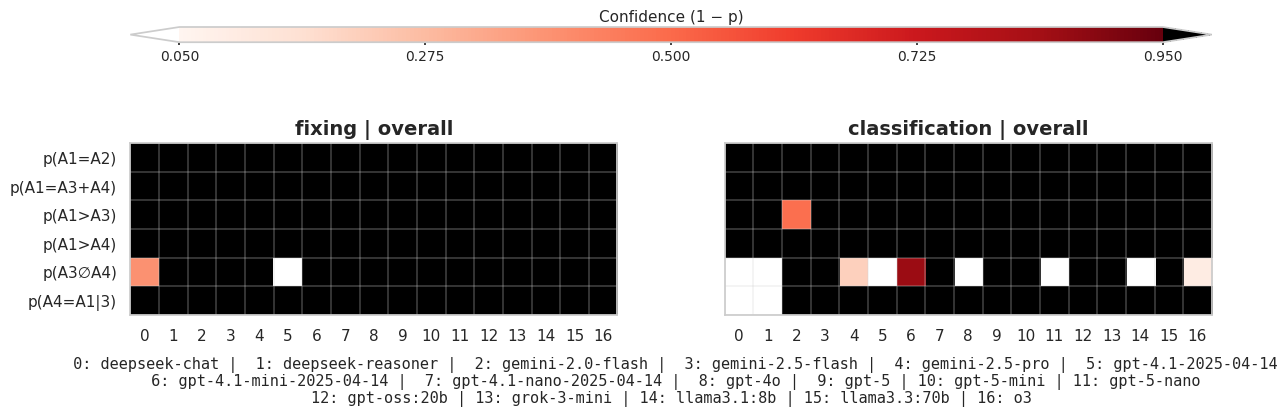

In [468]:
dataset="overall"
df_temp = p_value_matrix[p_value_matrix['dataset'] == dataset]

fig, axes = plot_heatmap_actions_1X2_vertical(
    df_temp, actions=["fixing","classification"], dataset=dataset,
    columns=["p(A1=A2)", "p(A1=A3+A4)", "p(A1>A3)", "p(A1>A4)", "p(A3∅A4)", "p(A4=A1|3)"],
    llms=llms,
    show_confidence=True,   # True -> 1 - p
    cmap="Reds",
    low_thr=0.05, high_thr=0.95,
    under_color="white", over_color="black",
    tick_fs=11, title_fs=14,
    cell_in=0.34, wspace=0.22, cbar_height_ratio=0.045  # smaller bar
)
# fig.savefig("actions_vertical_1x2.png", dpi=300, bbox_inches="tight")
plt.show()


In [371]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.colors import Normalize

def plot_heatmap_actions_1xN(
    p_value_matrix: pd.DataFrame,          # df with ['llm','action'] + columns (p-values)
    actions: list[str],                    # length 2 or 3 (order = plot order left→right)
    dataset: str,
    columns: list[str],                    # predicate columns like ["p(A1=A2)", ...]
    llms: list[str],                       # row order (y-axis)
    *,
    show_confidence: bool = False,         # True -> plot 1 - p
    cmap: str = "Reds",
    low_thr: float = 0.05,
    high_thr: float = 0.95,
    under_color: str = "white",            # < low_thr
    over_color: str = "black",             # > high_thr
    tick_fs: int = 12,
    title_fs: int = 16,
    cell_in: float = 0.34,                 # inches per cell
    wspace: float = 0.0,                  # gap between subplots
    cbar_height_ratio: float = 0.10,       # relative height of colorbar row
    hide_row_labels_on_nonleft: bool = True,
    cbar_width_ratio: float = 0.06,   # <- add this
):
    """
    Plot 1×N heatmaps (N=2 or 3): rows=LLMs, cols=predicates. All share the same color scale.
    - Only the left plot shows y-axis (LLM) labels (unless disabled).
    - Colorbar is compact at the bottom with label above the bar.
    """
    k = len(actions)
    if k not in (2, 3):
        raise ValueError("actions must have length 2 or 3.")

    # Ensure numeric p-values
    sub = p_value_matrix[['llm', 'action'] + columns].copy()
    for c in columns:
        sub[c] = pd.to_numeric(sub[c], errors="coerce")

    # Build matrices (rows=LLMs, cols=predicates) — one per action in the given order
    mats = []
    for act in actions:
        df_a = sub[sub['action'] == act][['llm'] + columns]
        mat = df_a.set_index('llm').reindex(index=llms, columns=columns)
        mats.append(mat)

    # Values to display
    # disp = [(1.0 - M) if show_confidence else M for M in mats]
    disp = [(1.0 - M) if show_confidence else M for M in mats]
    n_rows, n_cols = len(llms), len(columns)

    # Figure size to keep cells square-ish
    sub_w = max(5.0, n_cols * cell_in)
    sub_h = max(5.0, n_rows * cell_in)
    fig_w = sub_w * k + 0.6 + (k-1) * 0.1      # small extra width
    fig_h = sub_h + 1.15                       # room for colorbar

    rc = {"text.usetex": False, "font.family": "DejaVu Sans", "mathtext.fontset": "dejavusans"}
    with plt.rc_context(rc):
        fig = plt.figure(figsize=(fig_w, fig_h))

        # GridSpec: first row = heatmaps, second row = compact colorbar
        gs = GridSpec(1, k + 1, figure=fig, width_ratios=[1.0]*k + [cbar_width_ratio],
              wspace=wspace)


        # Thresholded normalization & colormap [0.05–0.95], with under/over colors
        norm = Normalize(vmin=low_thr, vmax=high_thr)
        base = plt.get_cmap(cmap)
        try:
            cmap_obj = base.with_extremes(under=under_color, over=over_color)
        except AttributeError:
            cmap_obj = base
            cmap_obj.set_under(under_color)
            cmap_obj.set_over(over_color)

        ims, axes = [], []
        for i, (act, M) in enumerate(zip(actions, disp)):
            ax = fig.add_subplot(gs[0, i])
            axes.append(ax)

            im = ax.imshow(M, norm=norm, cmap=cmap_obj, interpolation="nearest")
            ims.append(im)

            # Square cells: aspect = rows / cols
            try:
                ax.set_box_aspect(n_rows / n_cols)
            except Exception:
                ax.set_aspect('equal', adjustable='box')

            # Ticks & labels
            ax.set_xticks(range(n_cols)); ax.set_yticks(range(n_rows))
            ax.set_xticklabels(columns, rotation=90, fontsize=tick_fs)
            if hide_row_labels_on_nonleft and i > 0:
                ax.set_yticklabels([])
            else:
                ax.set_yticklabels(llms, fontsize=tick_fs)

            # light cell borders
            for x in range(n_cols + 1):
                ax.axvline(x - 0.5, color="lightgray", linewidth=0.35)
            for y in range(n_rows + 1):
                ax.axhline(y - 0.5, color="lightgray", linewidth=0.35)

            ax.set_title(f"{act} | {dataset}", fontsize=title_fs, pad=6, fontweight="semibold")
            ax.grid(False)

        # Compact bottom colorbar spanning all heatmaps
        cax = fig.add_subplot(gs[0, -1])   # last column = colorbar
        cbar = fig.colorbar(ims[0], cax=cax, orientation="vertical", extend="both")
        cbar.set_label(
            "Confidence (1 − p)" if show_confidence else "p-value (0 → low, 1 → high)",
            fontsize=tick_fs, labelpad=10
        )
        cbar.ax.yaxis.set_label_position('right')
        cbar.ax.yaxis.set_ticks_position('right')
        cbar.ax.tick_params(axis='y', labelsize=tick_fs, length=3)
        cbar.set_ticks(np.linspace(low_thr, high_thr, 5))


        cbar.ax.tick_params(axis='x', labelbottom=True, labeltop=False,
                            labelsize=max(tick_fs-1, 9), length=2)
        cbar.set_ticks(np.linspace(low_thr, high_thr, 5))

        # Margins: leave room on the left for LLM names
        left_margin = 0.26 if (not hide_row_labels_on_nonleft or k >= 1) else 0.10
        fig.subplots_adjust(left=left_margin, right=0.99, top=0.93, bottom=0.14)

    return fig, axes


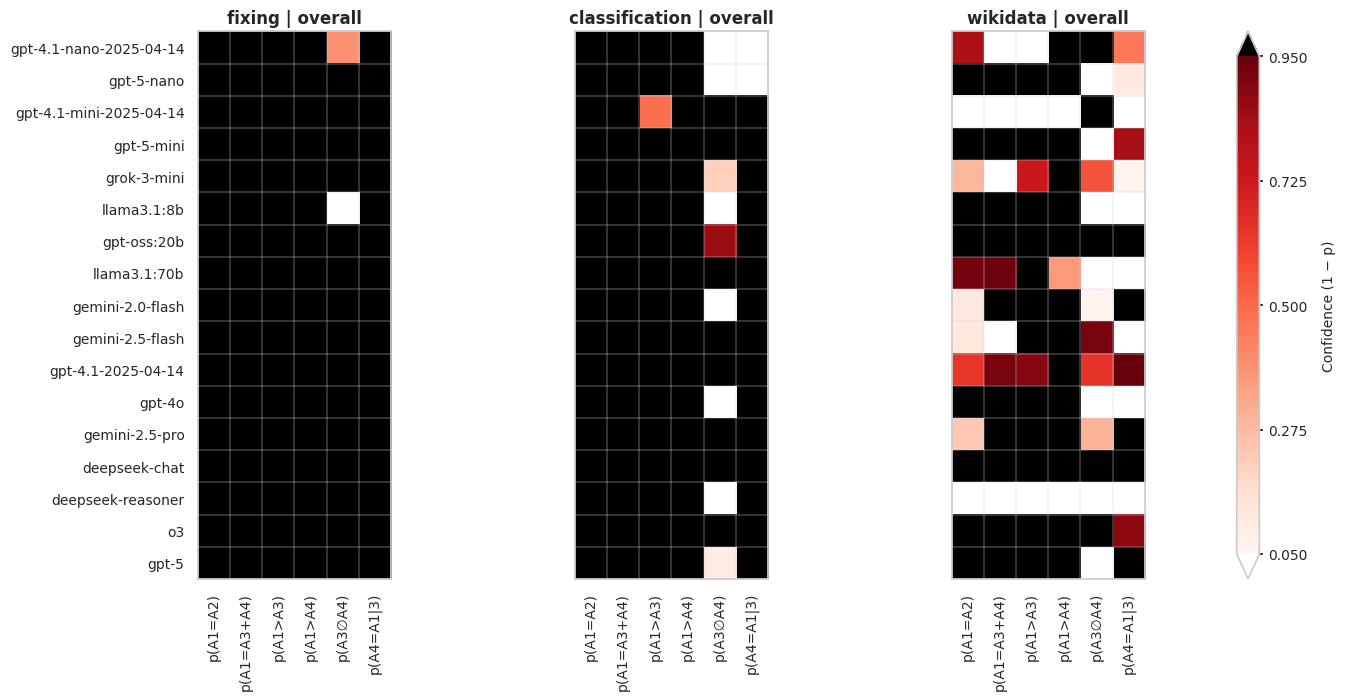

In [469]:
dataset="overall"
df_temp = p_value_matrix[p_value_matrix['dataset'] == dataset]

fig, axes = plot_heatmap_actions_1xN(
    df_temp,
    actions=["fixing", "classification", "wikidata"],
    dataset="overall",
    columns=["p(A1=A2)", "p(A1=A3+A4)", "p(A1>A3)", "p(A1>A4)", "p(A3∅A4)", "p(A4=A1|3)"],
    llms=llms,
    show_confidence=True,
    cmap="Reds",
    low_thr=0.05, high_thr=0.95,
    under_color="white", over_color="black",
    tick_fs=10, title_fs=12,
    cell_in=0.34, wspace=0.0, cbar_height_ratio=0.06,
    hide_row_labels_on_nonleft=True
)
plt.show()


In [472]:
import os
import matplotlib.pyplot as plt

def save_all_dataset_plots_1X3(
    p_value_matrix: pd.DataFrame,
    actions: list[str],
    columns: list[str],
    llms: list[str],
    out_dir: str = "plots",
    show_confidence: bool = True,
    **kwargs,                     # pass through to plot_heatmap_actions_1xN
):
    """
    For each dataset in p_value_matrix, generate a 1xN heatmap panel and save it.
    """
    os.makedirs(out_dir, exist_ok=True)

    datasets = p_value_matrix['dataset'].unique()
    paths = []
    for ds in datasets:
        df_temp = p_value_matrix[p_value_matrix['dataset'] == ds]

        fig, axes = plot_heatmap_actions_1xN(
            df_temp,
            actions=actions,
            dataset=ds,
            columns=columns,
            llms=llms,
            show_confidence=show_confidence,
            **kwargs
        )

        fname = f"{ds.replace(' ', '_')}_heatmaps.png"
        fpath = os.path.join(out_dir, fname)
        fig.savefig(fpath, dpi=300, bbox_inches="tight")
        plt.close(fig)
        paths.append(fpath)
        print(f"Saved: {fpath}")

    return paths


In [474]:
import os
import matplotlib.pyplot as plt

def save_all_dataset_plots_vertical(
    p_value_matrix: pd.DataFrame,
    actions: list[str],             # must be length 2
    columns: list[str],
    llms: list[str],
    out_dir: str = "plots_vertical",
    show_confidence: bool = True,
    **kwargs,                       # pass-through to plot_heatmap_actions_1X2_vertical
):
    """
    For each dataset in p_value_matrix, generate a 1x2 vertical heatmap panel and save it.
    """
    if len(actions) != 2:
        raise ValueError("plot_heatmap_actions_1X2_vertical requires exactly 2 actions")

    os.makedirs(out_dir, exist_ok=True)

    datasets = p_value_matrix['dataset'].unique()
    paths = []
    for ds in datasets:
        df_temp = p_value_matrix[p_value_matrix['dataset'] == ds]

        fig, axes = plot_heatmap_actions_1X2_vertical(
            df_temp,
            actions=actions,
            dataset=ds,
            columns=columns,
            llms=llms,
            show_confidence=show_confidence,
            **kwargs
        )

        fname = f"{ds.replace(' ', '_')}_vertical.png"
        fpath = os.path.join(out_dir, fname)
        fig.savefig(fpath, dpi=300, bbox_inches="tight")
        plt.close(fig)
        paths.append(fpath)
        print(f"Saved: {fpath}")

    return paths


In [473]:
paths = save_all_dataset_plots_1X3(
p_value_matrix,
actions=["fixing", "classification", "wikidata"],
columns=["p(A1=A2)", "p(A1=A3+A4)", "p(A1>A3)", "p(A1>A4)", "p(A3∅A4)", "p(A4=A1|3)"],
llms=llms,
out_dir="../../new_charts/p_value_heatmap_actions_1x3",
cmap="Reds",
low_thr=0.05, high_thr=0.95,
under_color="white", over_color="black",
tick_fs=10, title_fs=12,
cell_in=0.34, wspace=0.0,
hide_row_labels_on_nonleft=True,
)


Saved: ../../new_charts/p_value_heatmap_actions_1x3/qawiki_heatmaps.png
Saved: ../../new_charts/p_value_heatmap_actions_1x3/spinach_heatmaps.png
Saved: ../../new_charts/p_value_heatmap_actions_1x3/synthetic_heatmaps.png
Saved: ../../new_charts/p_value_heatmap_actions_1x3/overall_heatmaps.png


In [475]:
paths = save_all_dataset_plots_vertical(
p_value_matrix,
actions=["fixing", "classification"],
columns=["p(A1=A2)", "p(A1=A3+A4)", "p(A1>A3)", "p(A1>A4)", "p(A3∅A4)", "p(A4=A1|3)"],
llms=llms,
out_dir="../../new_charts/p_value_heatmap_actions_1x2",
cmap="Reds",
low_thr=0.05, high_thr=0.95,
under_color="white", over_color="black",
tick_fs=11, title_fs=14,
cell_in=0.34, wspace=0.22, cbar_height_ratio=0.045,
)


Saved: ../../new_charts/p_value_heatmap_actions_1x2/qawiki_vertical.png
Saved: ../../new_charts/p_value_heatmap_actions_1x2/spinach_vertical.png
Saved: ../../new_charts/p_value_heatmap_actions_1x2/synthetic_vertical.png
Saved: ../../new_charts/p_value_heatmap_actions_1x2/overall_vertical.png


# LLMs Consistency 

In [30]:
predicates

['?A1=A2', '?A1>A3', '?A1>A4', '?A1=A3+A4', '?A3∅A4', '?A4=A1|3']

In [38]:
dataset = "overall"
actions = ["zero-shot","fixing", "classification", "wikidata"]
df_temp = df_summery[df_summery["dataset"] == dataset]
value_list = []
for action in actions:
    # for p in predicates:
    p = predicates[0]
    values = df_temp[df_temp["action"]==action][p].to_list()
    value_list.append(values)
    print(len(values), action, p)
len(value_list)

17 zero-shot ?A1=A2
17 fixing ?A1=A2
17 classification ?A1=A2
16 wikidata ?A1=A2


4

### Line Chart

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
from typing import Sequence, Optional, Tuple, List

# ---------- Core helpers ----------

def llm_order_from_df(df: pd.DataFrame, default_sort: bool = False) -> List[str]:
    """
    Derive an LLM order from the dataframe.
    Preference:
      1) Order of appearance within 'zero-shot' if present
      2) Otherwise, order of appearance in df
      3) If default_sort=True, alphabetical
    """
    if "llm" not in df.columns:
        raise KeyError("DataFrame must have column 'llm'.")
    base = df.copy()
    if "action" in base.columns and (base["action"] == "zero-shot").any():
        base = base[base["action"] == "zero-shot"]
    seen = []
    for llm in base["llm"].tolist():
        if llm not in seen:
            seen.append(llm)
    if not seen:
        seen = list(dict.fromkeys(df["llm"].tolist()))
    if default_sort:
        seen = sorted(seen)
    return seen

def filter_predicate(df: pd.DataFrame, predicate_col: str = "?A1=A2",
                     dataset: Optional[str] = None,
                     actions: Optional[Sequence[str]] = None) -> pd.DataFrame:
    """
    Filter df to the rows relevant for a given predicate, dataset and subset of actions.
    Returns columns: [dataset, action, llm, predicate_value]
    """
    if predicate_col not in df.columns:
        raise KeyError(f"Column '{predicate_col}' not found.")
    sub = df.copy()
    if dataset is not None:
        sub = sub[sub["dataset"] == dataset]
    if actions is not None:
        sub = sub[sub["action"].isin(list(actions))]
    sub = sub[["dataset", "action", "llm", predicate_col]].rename(columns={predicate_col: "value"})
    return sub

def values_in_llm_order(df_sub: pd.DataFrame, llms: Sequence[str], action: str) -> List[float]:
    """
    Given a filtered sub-df (single dataset) and one action, return values in the order of llms.
    """
    one = df_sub[df_sub["action"] == action].set_index("llm")["value"].to_dict()
    return [one.get(llm, float("nan")) for llm in llms]

# ---------- Plot ----------

def plot_llms_for_predicate(
    df: pd.DataFrame,
    predicate_col: str = "?A1=A2",
    dataset: str = "overall",
    actions: Sequence[str] = ("fixing", "classification"),
    llms: Optional[Sequence[str]] = None,
    connect_lines: bool = True,
    annotate: bool = True,
    title: Optional[str] = None,
    ylabel: str = "Score"
) -> Tuple[plt.Figure, plt.Axes, pd.DataFrame]:
    """
    Visualize LLM performance for a predicate across actions for a single dataset.

    Returns (fig, ax, tidy_df) where tidy_df has columns: [llm, action, value].
    """
    sub = filter_predicate(df, predicate_col=predicate_col, dataset=dataset, actions=actions)
    if sub.empty:
        raise ValueError("No data after filtering. Check dataset/predicate/actions.")
    if llms is None:
        llms = llm_order_from_df(df[df["dataset"] == dataset])  # infer order
    xs = list(range(len(llms)))

    # Build tidy for display
    tidy_rows = []
    for act in actions:
        vals = values_in_llm_order(sub, llms, act)
        for nm, v in zip(llms, vals):
            tidy_rows.append({"llm": nm, "action": act, "value": v})
    tidy = pd.DataFrame(tidy_rows)

    # Plot (single axes)
    fig, ax = plt.subplots(figsize=(12, 5))
    for act in actions:
        ys = tidy[tidy["action"] == act]["value"].tolist()
        ax.scatter(xs, ys, label=act)
        if connect_lines:
            ax.plot(xs, ys)
        if annotate:
            for x, y in zip(xs, ys):
                if pd.notna(y):
                    ax.annotate(f"{y:.3f}", (x, y), textcoords="offset points", xytext=(0, 6), ha="center")

    ax.set_xticks(xs)
    ax.set_xticklabels(list(llms), rotation=45)
    ax.set_ylabel(ylabel)
    if title is None:
        title = f"{dataset}: {predicate_col} Consistency Rates"
    ax.set_title(title)
    if len(actions) > 1:
        ax.legend()
    ax.grid(True, axis="y", linestyle="--", alpha=0.4)
    fig.tight_layout()
    return fig, ax, tidy

In [416]:
llms = [
 'llama3.1:8b',
 'llama3.1:70b',
 'deepseek-chat',
 'deepseek-reasoner',
 'grok-3-mini',
 'gemini-2.0-flash',
 'gemini-2.5-flash',
 'gemini-2.5-pro',
 'gpt-4.1-2025-04-14',
 'gpt-4.1-mini-2025-04-14',
 'gpt-4.1-nano-2025-04-14',
 'gpt-4o',
 'o3',
 'gpt-oss:20b',
 'gpt-5-nano',
 'gpt-5-mini',
 'gpt-5']

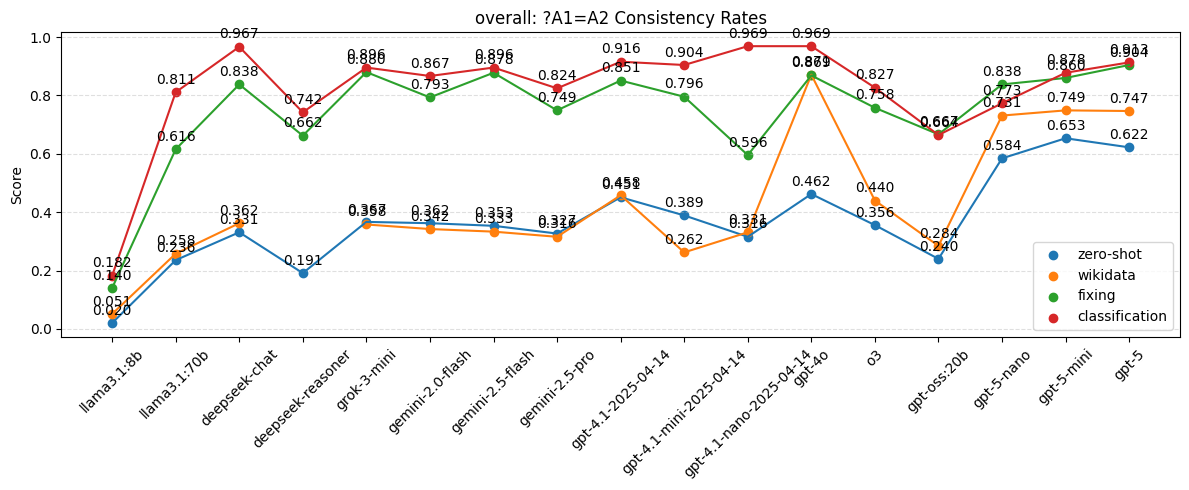

In [101]:
actions = ["zero-shot", "wikidata", "fixing", "classification"]
fig, ax, tidy = plot_llms_for_predicate(
    df_summery, predicate_col="?A1=A2", dataset="overall",
    actions= actions,
    llms=llms, connect_lines=True, annotate=True,
)


In [361]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools, matplotlib as mpl
from matplotlib.gridspec import GridSpec
from typing import Sequence, Optional, Tuple, List

# --- helpers from your snippet (unchanged) ---
def llm_order_from_df(df: pd.DataFrame, default_sort: bool = False) -> List[str]:
    if "llm" not in df.columns:
        raise KeyError("DataFrame must have column 'llm'.")
    base = df.copy()
    if "action" in base.columns and (base["action"] == "zero-shot").any():
        base = base[base["action"] == "zero-shot"]
    seen = []
    for llm in base["llm"].tolist():
        if llm not in seen:
            seen.append(llm)
    if not seen:
        seen = list(dict.fromkeys(df["llm"].tolist()))
    if default_sort:
        seen = sorted(seen)
    return seen

def filter_predicate(df: pd.DataFrame, predicate_col: str = "?A1=A2",
                     dataset: Optional[str] = None,
                     actions: Optional[Sequence[str]] = None) -> pd.DataFrame:
    if predicate_col not in df.columns:
        raise KeyError(f"Column '{predicate_col}' not found.")
    sub = df.copy()
    if dataset is not None:
        sub = sub[sub["dataset"] == dataset]
    if actions is not None:
        sub = sub[sub["action"].isin(list(actions))]
    sub = sub[["dataset", "action", "llm", predicate_col]].rename(columns={predicate_col: "value"})
    return sub

def values_in_llm_order(df_sub: pd.DataFrame, llms: Sequence[str], action: str) -> List[float]:
    one = df_sub[df_sub["action"] == action].set_index("llm")["value"].to_dict()
    return [one.get(llm, float("nan")) for llm in llms]

# --- NEW: grid function with index x-axis, bottom legend band, and value toggle ---
def plot_llms_for_predicates(
    df: pd.DataFrame,
    predicate_cols: Sequence[str],
    dataset: str = "overall",
    actions: Sequence[str] = ("fixing", "classification"),
    llms: Optional[Sequence[str]] = None,
    connect_lines: bool = True,
    show_values: bool = True,           # <— toggle numeric annotation on nodes
    titles: Optional[Sequence[str]] = None,
    ylabel: str = "Score",
    ncols: int = 3,
    figsize: Tuple[int, int] = (16, 9),
    show_action_palette: bool = True,                 # show one legend row for actions at top
    action_palette: Optional[dict] = None,            # {action: color}; overrides defaults
    index_starts_at: int = 1            # set to 0 if you prefer 0-based
) -> Tuple[plt.Figure, np.ndarray, dict]:
    """
    Grid plot of LLM performance for multiple predicates (one subplot per predicate).

    - X axis uses integer indices (1..N by default) for models.
    - A bottom band shows "index : LLM" mapping, split into 1–3 lines dynamically.
    - `show_values=True` annotates each node with its numeric value.
    """
    if llms is None:
        llms = llm_order_from_df(df[df["dataset"] == dataset])  # infer order

    # integer x positions (1..N by default)
    xs = list(range(index_starts_at, index_starts_at + len(llms)))

    n = len(predicate_cols)
    # prefer 2 rows when there are >3 subplots; else single row
    nrows = 2 if n > 3 else 1
    ncols_eff = math.ceil(n / nrows)

    # bottom legend band height depends on number of columns (and thus how many lines we’ll draw)
    n_index_lines = max(1, ncols_eff)
    bottom_band = {1: 0.30, 2: 0.40, 3: 0.50}.get(n_index_lines, 0.45)


    # Consistent color mapping for actions (used in all subplots)
    if action_palette is None:
        base_colors = mpl.rcParams['axes.prop_cycle'].by_key().get('color',
                        ['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9'])
        cyc = itertools.cycle(base_colors)
        action_colors = {act: next(cyc) for act in actions}
    else:
        action_colors = {act: action_palette.get(act, 'C0') for act in actions}



    fig = plt.figure(figsize=figsize)
    gs = GridSpec(
        nrows + 1,            # +1 row for bottom index legend
        ncols_eff,            # no right gutter needed for this line-style plot
        figure=fig,
        height_ratios=[1]*nrows + [bottom_band]
    )

    axes = np.empty((nrows, ncols_eff), dtype=object)
    for r in range(nrows):
        for c in range(ncols_eff):
            axes[r, c] = fig.add_subplot(gs[r, c])
    axes_flat = axes.ravel()

    tidy_by_pred = {}
    for i, pred in enumerate(predicate_cols):
        ax = axes_flat[i]
        sub = filter_predicate(df, predicate_col=pred, dataset=dataset, actions=actions)
        if sub.empty:
            ax.set_visible(False)
            continue

        # tidy table for this predicate
        rows = []
        for act in actions:
            vals = values_in_llm_order(sub, llms, act)
            for nm, v, x in zip(llms, vals, xs):
                rows.append({"llm": nm, "action": act, "value": v, "x": x})
        tidy = pd.DataFrame(rows)
        tidy_by_pred[pred] = tidy

        for act in actions:
            part = tidy[tidy["action"] == act]
            ys = part["value"].tolist()
            col = action_colors[act]
            ax.scatter(xs, ys, color=col)      # ensure color matches global legend
            if connect_lines:
                ax.plot(xs, ys, color=col)
            if show_values and i == 0:         # << show labels ONLY on first subplot
                for x, y in zip(xs, ys):
                    if pd.notna(y):
                        ax.annotate(f"{y:.3f}", (x, y),
                                    textcoords="offset points", xytext=(0, 6),
                                    ha="center", fontsize=8, color=col)


        # x ticks show indices only (not names)
        ax.set_xticks(xs)
        ax.set_xticklabels([str(i) for i in xs], rotation=0)
        # ax.set_xlabel("Index")
        ax.set_ylabel(ylabel)
        ttl = (titles[i] if titles and i < len(titles) else f"{pred}")
        ax.set_title(ttl)
        # if len(actions) > 1:
        #     ax.legend(fontsize=8)
        ax.grid(True, axis="y", linestyle="--", alpha=0.4)
    
    # hide unused axes
    for j in range(i + 1, len(axes_flat)):
        axes_flat[j].set_visible(False)

    # ---------- Index : LLM legend (bottom band, dynamic line count) ----------
    llm_names = list(llms)
    legend_ax = fig.add_subplot(gs[nrows, :])  # bottom row spanning all columns
    legend_ax.axis("off")

    # decide how many lines (1..3) based on ncols_eff
    n_lines = max(1, min(3, ncols_eff))
    chunk = math.ceil(len(llm_names) / n_lines)
    lines = []
    start_idx = index_starts_at
    for i_line in range(n_lines):
        start = i_line * chunk
        end   = (i_line + 1) * chunk
        seg   = llm_names[start:end]
        if not seg:
            continue
        line = " | ".join(f"{idx:>2}: {name}"
                          for idx, name in enumerate(seg, start=start_idx + start))
        lines.append(line)

    # place the lines at vertically spaced positions in the band
    tick_fs = 9
    ys = np.linspace(0.75, 0.15, num=len(lines)) if lines else []
    for y, line in zip(ys, lines):
        legend_ax.text(0.5, y, line, ha="center", va="center",
                       family="monospace", fontsize=tick_fs)
    # -------------------------------------------------------------------------
        # ---------- Top-row predicate color legend (one line) ----------
    # ---------- Top-row ACTIONS legend (one line, colors match subplots) ----------
    if show_action_palette:
        from matplotlib.lines import Line2D
        action_proxies = [
            Line2D([], [], marker='o', linestyle='None',
                markersize=9, markerfacecolor=action_colors[a],
                markeredgecolor=action_colors[a])
            for a in actions
        ]
        # Leave a bit of top room; reuse same rect in tight_layout below
        top_rect = (0.05, 0.12 + 0.02 * (max(1, min(3, ncols_eff)) - 1), 0.98, 0.90)
        fig.tight_layout(rect=top_rect)

        fig.legend(
            action_proxies, list(actions),
            title="Actions",
            loc="lower center", bbox_to_anchor=(0.5, 0.95),
            ncol=len(actions), frameon=False,
            handlelength=1.2, handletextpad=0.6, columnspacing=1.2
        )
    else:
        top_rect = (0.05, 0.12 + 0.02 * (max(1, min(3, ncols_eff)) - 1), 0.9, 0.9)
    # -----------------------------------------------------------------------------

    # ---------------------------------------------------------------

    # final layout (leave room at bottom for the band)
    fig.tight_layout(rect=(0.05, 0.12 + 0.02 * (n_lines - 1), 0.98, 0.96))
    fig.suptitle(f"LLMs consistency ({dataset})", fontsize=14, y=1.05)

    return fig, axes, tidy_by_pred


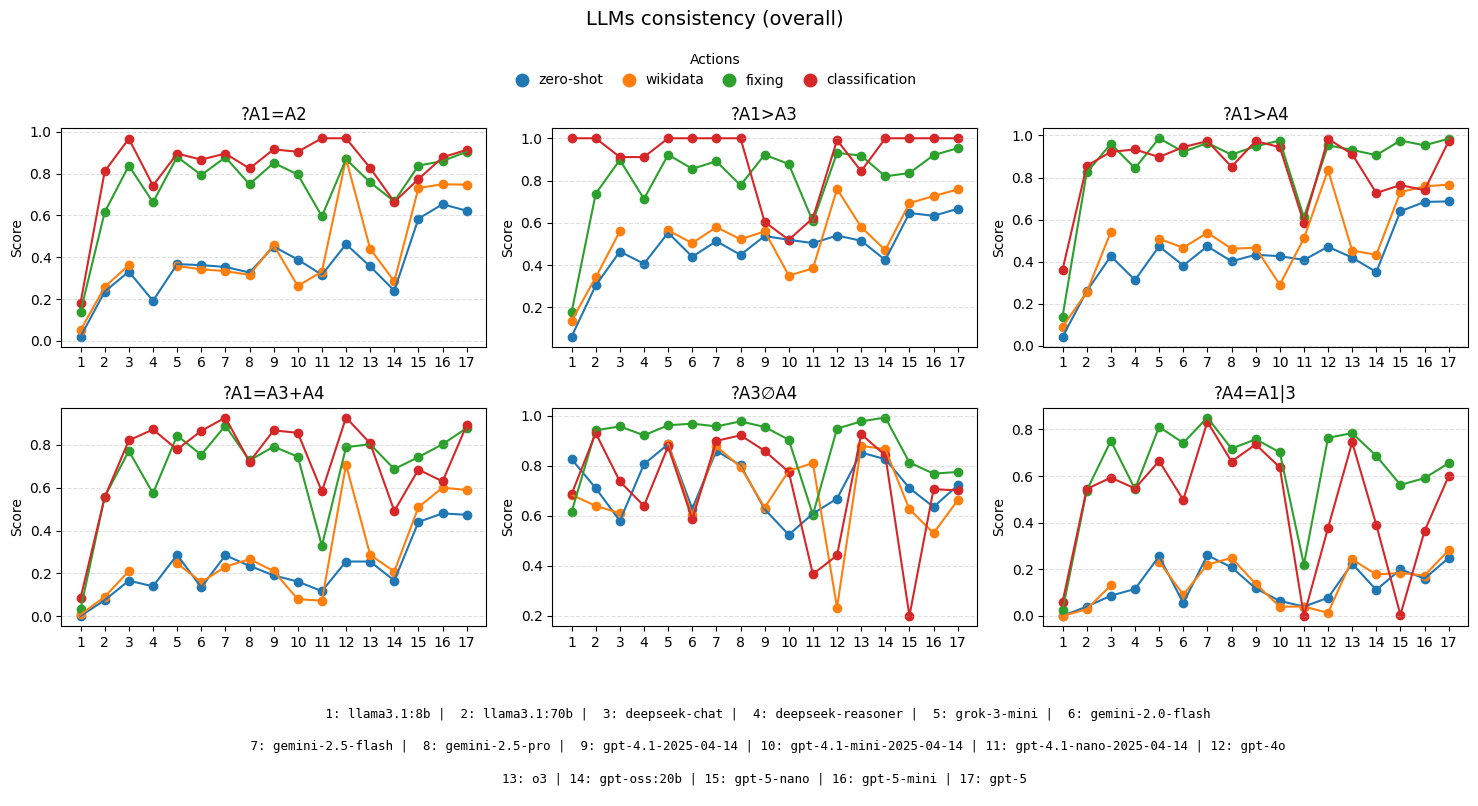

In [362]:
predicates = ["?A1=A2","?A1>A3","?A1>A4","?A1=A3+A4","?A3∅A4","?A4=A1|3"]

fig, axes, tidy = plot_llms_for_predicates(
    df=df_summery,
    predicate_cols=predicates,
    dataset="overall",
    actions=actions,
    llms=llms,             # your sorted LLM list
    ncols=3,               # 6 → 2x3; 4 → 2x2 if you pass 4 predicates
    figsize=(16, 9),
    connect_lines=True,   # scatter only if you want
    show_values=False      # turn OFF numeric labels on each node
)
plt.show()


In [374]:
from pathlib import Path
import re
import matplotlib.pyplot as plt

def _slug(s: str) -> str:
    """Filesystem-safe slug."""
    return re.sub(r"[^A-Za-z0-9._+-]+", "_", str(s)).strip("_")

def save_all_line_plots(
    *,
    df,
    predicate_cols,
    actions,
    llms,
    outdir="/line_chart",
    ncols=3,
    figsize=(16, 9),
    connect_lines=True,
    show_values=False,
    index_starts_at=1,
    show_action_palette=True,
    action_palette=None,
    dpi=200
):
    """
    Render and save a grid plot for each dataset found in df['dataset'].
    Returns a list of saved file paths.
    """
    out_path = Path(out_dir)
    out_path.mkdir(parents=True, exist_ok=True)

    datasets = sorted(df["dataset"].dropna().unique().tolist())
    saved_paths = []

    for ds in datasets:
        fig, axes, _ = plot_llms_for_predicates(
            df=df,
            predicate_cols=predicate_cols,
            dataset=ds,
            actions=actions,
            llms=llms,
            ncols=ncols,
            figsize=figsize,
            connect_lines=connect_lines,
            show_values=show_values,
            index_starts_at=index_starts_at,
            show_action_palette=show_action_palette,
            action_palette=action_palette
        )

        folder = Path(outdir)
        folder.mkdir(parents=True, exist_ok=True) 

        fig.savefig(f"{folder}/{ds}.png", dpi=dpi, bbox_inches="tight")
        plt.close(fig)
        

  


In [ ]:
predicates=["?A1=A2","?A1>A3","?A1>A4","?A1=A3+A4","?A3∅A4","?A4=A1|3"]
paths = save_all_line_plots(
    df=df_summery,
    predicate_cols=predicates,
    actions=actions,
    llms=llms,
    outdir=f"{out_dir}/line_chart",
    ncols=3,
    figsize=(16, 9),
    connect_lines=True,
    show_values=False
)



In [375]:
J_predicates = ["J(A1-A2)","J(A1-A34)","J(A3-A4)","J(A4-A1|3)"]
paths = save_all_line_plots(
    df=df_summery,
    predicate_cols=J_predicates,
    actions=actions,
    llms=llms,
    outdir=f"{out_dir}/line_chart_jaccard",
    ncols=3,
    figsize=(16, 9),
    connect_lines=True,
    show_values=False
)



### Scatter Bubble

In [8]:
from datetime import datetime, timedelta
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def draw_llm_bubble_scatter(
    llms,
    df,
    predicate_col, 
    dataset,
    actions,
    bubble_sizes,
    release_dates,
    *,
    date_format="%Y-%m-%d",
    families=None,                  # dict[model] -> "OpenAI"/"Google"/"Meta"/...
    legend_position="top",          # "top" or "bottom" (outside)
    annotate=True,
    annotate_rotation=20,
    label_vnudges_px=10,
    jitter_same_day=True,
    jitter_days=0.25,
    title="LLM performance vs. release date (bubble size provided)",
    ylabel="Performance",
    ax=None
):
    """
    Draw a bubble scatter where:
      - x-axis = release date (from `release_dates`)
      - y-axis = `values` aligned to `llms`
      - bubble size = `bubble_sizes[llm]` (points^2; use your own scaling)
      - color = `families[llm]` if provided; otherwise a single color

    Parameters
    ----------
    llms : list[str]
        Sorted list of model names.
    values : list[float]
        Sorted metric values aligned with `llms` (same length).
    bubble_sizes : dict[str, float]
        Bubble area in points^2 for each model.
    release_dates : dict[str, str|datetime]
        Model -> date ("YYYY-MM-DD" or datetime).
    date_format : str
        If dates are strings, the format to parse them.
    families : dict[str, str] | None
        Optional mapping to color by company/family and create an outside legend.
    legend_position : str
        "top" or "bottom" (outside of plot area).
    annotate : bool
        Show model names next to points.
    annotate_rotation : int
        Rotation angle for labels.
    label_vnudges_px : int
        Pixel-based alternating vertical nudges to reduce overlap.
    jitter_same_day : bool
        Slightly jitter same-day points horizontally to avoid perfect overlap.
    jitter_days : float
        Jitter amount in days for same-day points.
    title, ylabel : str
        Figure text.
    ax : matplotlib.axes.Axes | None
        Existing axes to draw on.
    """
    sub = filter_predicate(df, predicate_col=predicate_col, dataset=dataset, actions=actions)
    if sub.empty:
        raise ValueError("No data after filtering. Check dataset/predicate/actions.")
    if llms is None:
        llms = llm_order_from_df(df[df["dataset"] == dataset])  # infer order
    # Parse/normalize dates
    def to_dt(d):
        if isinstance(d, datetime):
            return d
        return datetime.strptime(d, date_format)

        # Build tidy for display
    values = []
    for act in actions:
        vals = values_in_llm_order(sub, llms, act)
        for nm, v in zip(llms, vals):
            values.append({"llm": nm, "action": act, "value": v})
    df_values = pd.DataFrame(values)
    values = df_values["value"].tolist()

    parsed_dates = {}
    for m in llms:
        if m not in release_dates:
            raise KeyError(f"Missing release date for model: {m}")
        parsed_dates[m] = to_dt(release_dates[m]["release_date"])

    # Collect points per color group (family or single)
    if families:
        color_key = lambda model: families.get(model, "Other")
        legend_title = "Family"
    else:
        color_key = lambda model: "Series"
        legend_title = "Series"

    groups = defaultdict(lambda: {"x": [], "y": [], "s": [], "labels": []})
    for m, v in zip(llms, values):
        d = parsed_dates[m]
        s = bubble_sizes.get(m, 120.0)  # default area if missing
        size_map = {"small": 80, "medium": 200, "large": 420}
        s = size_map.get(s, 120)  # map size names to areas if needed
        groups[color_key(m)]["x"].append(d)
        groups[color_key(m)]["y"].append(float(v))
        groups[color_key(m)]["s"].append(float(s))
        groups[color_key(m)]["labels"].append(m)

    # Optional jitter for exact same-day points (across all groups)
    if jitter_same_day:
        day_to_items = defaultdict(list)  # date -> [(group_name, idx_in_group)]
        for gname, G in groups.items():
            for i, d in enumerate(G["x"]):
                day_to_items[d.date()].append((gname, i))
        for _, items in day_to_items.items():
            if len(items) > 1:
                k = len(items)
                offsets = [((i - (k - 1)/2.0) * jitter_days) for i in range(k)]
                for off, (gname, idx) in zip(offsets, items):
                    groups[gname]["x"][idx] = groups[gname]["x"][idx] + timedelta(days=off)

    # Create axes
    if ax is None:
        fig, ax = plt.subplots(figsize=(11, 6))

    # Plot groups
    handles = {}
    all_texts = []
    for gname, G in groups.items():
        xs = [mdates.date2num(d) for d in G["x"]]
        sc = ax.scatter(xs, G["y"], s=G["s"], alpha=0.85, label=None if gname in handles else gname)
        if gname not in handles:
            handles[gname] = sc

        if annotate:
            for d, y, name in zip(G["x"], G["y"], G["labels"]):
                txt = ax.text(mdates.date2num(d), y, name,
                              fontsize=8, rotation=annotate_rotation,
                              ha="left", va="bottom", clip_on=False)
                all_texts.append(txt)

    # Gentle de-overlap with alternating vertical nudges (in display pixels)
    if annotate and all_texts:
        ax.figure.canvas.draw()
        all_texts.sort(key=lambda t: (t.get_position()[0], t.get_position()[1]))
        for i, t in enumerate(all_texts):
            dx = 0
            dy = ((-1) ** i) * label_vnudges_px
            xdata, ydata = t.get_position()
            xdisp, ydisp = ax.transData.transform((xdata, ydata))
            xnew, ynew = ax.transData.inverted().transform((xdisp + dx, ydisp + dy))
            t.set_position((xnew, ynew))

    # Axes formatting
    ax.set_title(title)
    ax.set_xlabel("Release date")
    ax.set_ylabel(ylabel)
    ax.grid(True, linestyle="--", alpha=0.35)
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
    ax.figure.autofmt_xdate()

    # Outside legend (if families provided)
    if families and handles:
        keys = list(handles.keys())
        hnds = [handles[k] for k in keys]
        if legend_position == "top":
            ax.legend(hnds, keys, title=legend_title, frameon=False,
                      bbox_to_anchor=(0.5, 1.22), loc="center", ncol=min(len(keys), 6))
        else:
            ax.legend(hnds, keys, title=legend_title, frameon=False,
                      bbox_to_anchor=(0.5, 0.22), loc="center", ncol=min(len(keys), 6))

    plt.tight_layout()
    return ax


In [11]:
import json

# root_dir = os.path.dirname(os.path.abspath(__name__))
folder = root_dir + "/output/"
llm_path = f"{root_dir}/data/llm_info.json"
with open(llm_path, "r", encoding="utf-8") as f:
    llm_info = json.load(f)


In [18]:
import os
from pathlib import Path
from datetime import datetime, timedelta
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import json
from matplotlib.gridspec import GridSpec


def draw_llm_bubble_grid(
    df: pd.DataFrame,
    predicates: list,                # list[str] -> one subplot per predicate
    llms: list,                      # sorted LLM names (display order)
    dataset: str,                    # dataset filter in df["dataset"]
    actions: list,    
    llm_info,               
    *,
    date_format: str = "%Y-%m-%d",
    legend_position: str = "top",    # "top" or "bottom" for the OUTSIDE legend
    annotate: bool = True,
    annotate_rotation: int = 0,
    label_vnudges_px: int = 0,
    jitter_same_day: bool = True,
    jitter_days: float = 0.0,
    ncols: int = 3,                  # e.g., 2 -> 2x?, 3 -> 2x3 for 6 preds, etc.
    figsize: tuple = (15, 8),
    title_prefix: str = "",          # optional prefix for each subplot title
    ylabel: str = "Performance",
    bucket_sizes: dict | None = None # map for named sizes -> area
):
    """
    Create a grid of bubble scatter plots:
      - 1 subplot per predicate in `predicates`.
      - x-axis = release date (from `release_dates`)
      - y-axis = aggregated metric per (llm, predicate) over selected `actions`
      - bubble size = `bubble_sizes[llm]` (points^2) or bucket name ('small'/'medium'/'large')

    Data expectations for `df`:
      - Must contain columns: 'dataset', 'llm', 'action', and each predicate name in `predicates`.
      - Each predicate column contains numeric metric values.

    Aggregation:
      - For each (llm, predicate), we take the mean over rows that match the given dataset & actions.
    """
    if bucket_sizes is None:
        bucket_sizes = {"small": 80, "medium": 200, "large": 420}

    # --- helpers -------------------------------------------------------------
    def _to_dt(d):
        if isinstance(d, datetime):
            return d
        if isinstance(d, dict) and "release_date" in d:
            d = d["release_date"]
        return datetime.strptime(d, date_format)

    # Parse/normalize release dates for all llms
    parsed_dates = {}
    for m in llms:
        if m not in llm_info:
            raise KeyError(f"Missing release date for model: {m}")
        parsed_dates[m] = _to_dt(llm_info[m]["release_date"])

    # Normalize bubble sizes (allow direct float or named buckets)
    def _area_for(m):
        s = llm_info[m].get("size", "medium")
        if isinstance(s, (int, float)):
            return float(s)
        return float(bucket_sizes.get(str(s), bucket_sizes["medium"]))

    # Filter df to dataset/actions once
    mask = (df["dataset"] == dataset) & (df["action"].isin(actions))
    base = df.loc[mask].copy()
    if base.empty:
        raise ValueError("No data after filtering. Check dataset/actions filter.")

    # Build values per predicate as list aligned with llms
    def _values_for_predicate(pred_col: str):
        # aggregate mean over actions for each llm
        agg = (base.groupby("llm")[pred_col]
                    .mean()
                    .reindex(llms))  # align to provided order
        if agg.isna().any():
            # fill missing llm with NaN-safe behavior (drop later)
            pass
        return agg.tolist()

    # color grouping
    def _group_key(model: str):
        return llm_info[model].get("company", "Other")

    # --- grid layout (dynamic: prefer 2 rows → 2x2 for 4, 2x3 for 6, etc.) ---
    n = len(predicates)

    # Prefer 2 rows when n > 3; otherwise 1 row
    nrows = 2 if n > 3 else 1
    ncols_eff = int(np.ceil(n / nrows))

    # Bottom index legend needs space proportional to how many lines we'll draw
    # We'll draw as many lines as columns (2 lines for 2x?, 3 lines for 3 columns)
    n_index_lines = max(1, ncols_eff)
    bottom_band = {1: 0.30, 2: 0.40, 3: 0.50}.get(n_index_lines, 0.45)

    fig = plt.figure(figsize=figsize)
    gs = GridSpec(
        nrows + 1,                 # +1 for bottom index legend band
        ncols_eff + 1,             # +1 slim legend gutter on the right
        figure=fig,
        height_ratios=[1]*nrows + [bottom_band],
        width_ratios=[1]*ncols_eff + [0.18]
    )

    # Build subplot axes (exclude the rightmost legend gutter column)
    axes = np.empty((nrows, ncols_eff), dtype=object)
    for r in range(nrows):
        for c in range(ncols_eff):
            axes[r, c] = fig.add_subplot(gs[r, c])
    axes_flat = axes.ravel()

    # Right-side legend gutter axis (optional use)
    legend_ax = fig.add_subplot(gs[:nrows, -1])
    legend_ax.axis("off")


    legend_handles = {}
    legend_title = ""

    for i, pred in enumerate(predicates):
        ax = axes_flat[i]
        vals = _values_for_predicate(pred)
        # Build grouped data
        groups = defaultdict(lambda: {"x": [], "y": [], "s": [], "labels": []})
        for m, v in zip(llms, vals):
            if pd.isna(v):
                continue
            d = parsed_dates[m]
            s = _area_for(m)
            groups[_group_key(m)]["x"].append(d)
            groups[_group_key(m)]["y"].append(float(v))
            groups[_group_key(m)]["s"].append(s)
            groups[_group_key(m)]["labels"].append(llms.index(m))

        # Jitter same-day points (across all groups in this subplot)
        if jitter_same_day:
            day_map = defaultdict(list)
            for gname, G in groups.items():
                for idx, d in enumerate(G["x"]):
                    day_map[d.date()].append((gname, idx))
            for _, items in day_map.items():
                if len(items) > 1:
                    k = len(items)
                    offsets = [((j - (k - 1)/2.0) * jitter_days) for j in range(k)]
                    for off, (gname, idx) in zip(offsets, items):
                        groups[gname]["x"][idx] = groups[gname]["x"][idx] + timedelta(days=off)

        # Plot
        texts = []
        for gname, G in groups.items():
            xs = [mdates.date2num(d) for d in G["x"]]
            sc = ax.scatter(xs, G["y"], s=G["s"], alpha=0.85,
                            label=None if gname in legend_handles else gname)
            if gname not in legend_handles:
                legend_handles[gname] = sc

            if annotate:
                for d, y, name in zip(G["x"], G["y"], G["labels"]):
                    t = ax.text(mdates.date2num(d), y, name,
                                fontsize=8, rotation=annotate_rotation,
                                ha="left", va="bottom", clip_on=False)
                    texts.append(t)

        # De-overlap labels by alternating vertical nudge
        if annotate and texts:
            fig.canvas.draw()
            texts.sort(key=lambda t: (t.get_position()[0], t.get_position()[1]))
            for j, t in enumerate(texts):
                dx = 0
                dy = ((-1) ** j) * label_vnudges_px
                xdata, ydata = t.get_position()
                xdisp, ydisp = ax.transData.transform((xdata, ydata))
                xnew, ynew = ax.transData.inverted().transform((xdisp + dx, ydisp + dy))
                t.set_position((xnew, ynew))

        # Ax formatting per subplot
        ttl = f"{title_prefix}{pred}" if title_prefix else str(pred)
        ax.set_title(ttl)
        ax.set_xlabel("Release date")
        ax.set_ylabel(ylabel)
        ax.grid(True, linestyle="--", alpha=0.35)
        ax.xaxis_date()
        ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
        # fig.autofmt_xdate()

    # Hide any unused axes
    for j in range(i + 1, len(axes_flat)):
        axes_flat[j].axis("off")

    if legend_handles:
        # --- 1) Build uniform-size FAMILY proxies (filled dots), left side ---
        fam_labels = list(legend_handles.keys())

        # get colors from your plotted handles
        fam_colors = []
        for k in fam_labels:
            fc = legend_handles[k].get_facecolor()
            color = fc[0] if hasattr(fc, "__len__") and len(fc) else fc
            fam_colors.append(color)

        # uniform "medium" bubble area for all family nodes
        medium_area = float(bucket_sizes["medium"])
        fam_handles = [
            plt.scatter([], [], s=medium_area,
                        facecolors=color, edgecolors=color, linewidths=0.9)
            for color in fam_colors
        ]

        # --- 2) Bubble-size proxies (hollow), right side ---
        size_order   = ["small", "medium", "large"]   # order on the right
        size_labels  = []
        size_handles = []
        for nm in size_order:
            if nm in bucket_sizes:
                size_handles.append(
                    plt.scatter([], [], s=bucket_sizes[nm],
                                facecolors="none", edgecolors="black", linewidths=0.9)
                )
                size_labels.append(f"Size: {nm.capitalize()}")

        # --- 3) Combine: families (left) + sizes (right) in ONE ROW ---
        combined_handles = fam_handles + size_handles
        combined_labels  = fam_labels  + size_labels

        # (Optional) reserve a bit more top space so legend never overlaps subplots
        # fig.tight_layout(rect=(0.04, 0.10, 0.98, 0.90))

        # --- 4) Draw legend in one row; sizes will appear on the right ---
        if legend_position == "top":
            fig.legend(
                combined_handles, combined_labels,
                title=legend_title, frameon=False,
                loc="lower center", bbox_to_anchor=(0.5, 1.0),
                ncol=len(combined_handles),
                handlelength=1.2, handletextpad=0.6, columnspacing=1.2
            )
        else:
            fig.legend(
                combined_handles, combined_labels,
                title=legend_title, frameon=False,
                loc="upper center", bbox_to_anchor=(0.5, 0.08),
                ncol=len(combined_handles),
                handlelength=1.2, handletextpad=0.6, columnspacing=1.2
            )

    date_locator   = mdates.AutoDateLocator()
    date_formatter = mdates.ConciseDateFormatter(date_locator)

    for r in range(nrows):
        for c in range(ncols_eff):
            ax_sub = axes[r, c]
            if r < nrows - 1:
                ax_sub.tick_params(axis='x', labelbottom=False)
            else:
                ax_sub.xaxis.set_major_locator(date_locator)
                ax_sub.xaxis.set_major_formatter(date_formatter)
                ax_sub.tick_params(axis='x', labelrotation=30)
                for lab in ax_sub.get_xticklabels():
                    lab.set_ha('right')


    # Give more bottom space so rotated ticks aren’t clipped
    fig.tight_layout(rect=(0.1, 0.1, 0.98, 0.99))  # leave ~10% at top for legend
    # fig.suptitle(f"LLMs consistency over time & parameter size  ({dataset} | {actions[0]})", fontsize=14, y=1.1)



 # leave room for outside legend
    return fig, axes


In [34]:
import matplotlib.patheffects as pe
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
from matplotlib.gridspec import GridSpec
from datetime import datetime, timedelta
from collections import defaultdict
import math, string


def draw_llm_bubble_grid(
    df: pd.DataFrame,
    predicates: list,                # one subplot per predicate (column name in df)
    llms: list,                      # display order of LLM names
    dataset: str,                    # df["dataset"] filter
    actions: list,                   # df["action"] values to include
    llm_info,                        # dict: llm -> {"release_date": "...", "company": "...", "size": ...}
    *,
    date_format: str = "%Y-%m-%d",
    legend_position: str = "top",    # "top" | "bottom"
    annotate: bool = True,
    annotate_rotation: int = 0,
    label_vnudges_px: int = 0,
    jitter_same_day: bool = True,
    jitter_days: float = 0.0,
    ncols: int = 3,                  # kept for API; layout below uses 2 rows if n>3
    figsize: tuple = (15, 8),
    title_prefix: str = "",
    ylabel: str = "Performance",
    bucket_sizes: dict | None = None,      # categorical sizes -> area (pt^2)
    size_area_range: tuple = (60, 500),    # numeric sizes -> area (pt^2)
    company_colors: dict | None = None     # FIX: explicit company -> color mapping
):
    # ---------- defaults ----------
    if bucket_sizes is None:
        bucket_sizes = {"small": 80, "medium": 200, "large": 420}

    # FIX: default company color map (Tab10-ish); override by passing company_colors
    if company_colors is None:
        company_colors = {
            "Meta":      "#1f77b4",  # blue
            "DeepSeek":  "#ff7f0e",  # orange
            "xAI":       "#2ca02c",  # green
            "Google":    "#d62728",  # red
            "OpenAI":    "#9467bd",  # purple
            "Other":     "#7f7f7f",  # gray
        }

    # ---------- helpers ----------
    def _to_dt(d):
        if isinstance(d, datetime):
            return d
        if isinstance(d, dict) and "release_date" in d:
            d = d["release_date"]
        return datetime.strptime(str(d), date_format)

    def _letters(n):
        """A, B, ..., Z, AA, AB, ... if needed"""
        out, i = [], 0
        while len(out) < n:
            q, r = divmod(i, 26)
            s = string.ascii_uppercase[r]
            if q > 0:
                s = string.ascii_uppercase[q-1] + s
            out.append(s)
            i += 1
        return out

    # ---------- parse release dates ----------
    parsed_dates = {}
    for m in llms:
        if m not in llm_info:
            raise KeyError(f"Missing info for model: {m}")
        rd = llm_info[m].get("release_date")
        if rd is None:
            raise KeyError(f"Missing release_date for model: {m}")
        parsed_dates[m] = _to_dt(rd)

    # ---------- sizes (areas) ----------
    size_raw = {}
    all_numeric = True
    for m in llms:
        # FIX: read "size", not "score"
        s = llm_info[m].get("size", "medium")
        try:
            if isinstance(s, str):
                s_clean = s.strip().lower().replace(",", "")
                if s_clean.endswith("b"):
                    val = float(s_clean[:-1]) * 1e9
                elif s_clean.endswith("m"):
                    val = float(s_clean[:-1]) * 1e6
                else:
                    val = float(s_clean)
                size_raw[m] = float(val)
            else:
                size_raw[m] = float(s)
        except Exception:
            all_numeric = False
            size_raw[m] = str(s).lower()

    area_map = {}
    if all_numeric:
        vals = np.array([size_raw[m] for m in llms], dtype=float)
        vmin, vmax = np.nanmin(vals), np.nanmax(vals)
        amin, amax = map(float, size_area_range)
        if not np.isfinite(vmin) or not np.isfinite(vmax):
            vmin, vmax = 0.0, 1.0
        if math.isclose(vmin, vmax):
            for m in llms:
                area_map[m] = 0.5 * (amin + amax)
        else:
            for m in llms:
                t = (float(size_raw[m]) - vmin) / (vmax - vmin)
                area_map[m] = amin + t * (amax - amin)
        size_legend_mode = "numeric"
        size_legend_vals  = (vmin, np.median(vals), vmax)
        size_legend_areas = (amin, 0.5*(amin+amax), amax)
    else:
        for m in llms:
            key = str(size_raw[m]).lower()
            area_map[m] = float(bucket_sizes.get(key, bucket_sizes["medium"]))
        size_legend_mode = "bucket"

    # grouping key
    def _group_key(model: str):
        return llm_info.get(model, {}).get("company", "Other")

    # ---------- filter DF ----------
    mask = (df["dataset"] == dataset) & (df["action"].isin(actions))
    base = df.loc[mask].copy()
    if base.empty:
        raise ValueError("No data after filtering. Check dataset/actions filter.")

    # labels A.. for bubbles
    letters = _letters(len(llms))
    label_map = {m: letters[i] for i, m in enumerate(llms)}

    # aggregate predicate values
    def _values_for_predicate(pred_col: str):
        return (
            base.groupby("llm")[pred_col]
                .mean()
                .reindex(llms)
                .tolist()
        )

    # ---------- layout ----------
    n = len(predicates)
    nrows = 2 if n > 3 else 1
    ncols_eff = int(np.ceil(n / nrows))

    fig = plt.figure(figsize=figsize)
    gs = GridSpec(nrows, ncols_eff + 1, figure=fig, width_ratios=[1]*ncols_eff + [0.18])

    axes = np.empty((nrows, ncols_eff), dtype=object)
    for r in range(nrows):
        for c in range(ncols_eff):
            axes[r, c] = fig.add_subplot(gs[r, c])
    axes_flat = axes.ravel()
    legend_ax = fig.add_subplot(gs[:, -1]); legend_ax.axis("off")

    legend_handles = {}

    for i, pred in enumerate(predicates):
        ax = axes_flat[i]
        vals = _values_for_predicate(pred)

        # group data
        groups = defaultdict(lambda: {"x": [], "y": [], "s": [], "labels": []})
        for m, v in zip(llms, vals):
            if pd.isna(v):
                continue
            groups[_group_key(m)]["x"].append(parsed_dates[m])
            groups[_group_key(m)]["y"].append(float(v))
            groups[_group_key(m)]["s"].append(area_map[m])
            groups[_group_key(m)]["labels"].append(label_map[m])

        # optional jitter for same-day points
        if jitter_same_day:
            day_map = defaultdict(list)
            for gname, G in groups.items():
                for idx, d in enumerate(G["x"]):
                    day_map[d.date()].append((gname, idx))
            for _, items in day_map.items():
                if len(items) > 1:
                    k = len(items)
                    offsets = [((j - (k - 1)/2.0) * jitter_days) for j in range(k)]
                    for off, (gname, idx) in zip(offsets, items):
                        groups[gname]["x"][idx] = groups[gname]["x"][idx] + timedelta(days=off)

        # plot per company with FIXED color
        texts = []
        for gname, G in groups.items():
            xs = [mdates.date2num(d) for d in G["x"]]
            color = company_colors.get(gname, company_colors["Other"])  # FIX: enforce company color
            sc = ax.scatter(xs, G["y"], s=G["s"], alpha=0.9,
                            facecolor=color, edgecolor=color, label=gname)
            if gname not in legend_handles:
                legend_handles[gname] = sc

            if annotate:
                # FIX: use each point’s area 'a' for font sizing, not the outer s_area
                for d, y, lab, a in zip(G["x"], G["y"], G["labels"], G["s"]):
                    radius_pts = np.sqrt(a)
                    fs = float(np.clip(0.36 * radius_pts, 6, 13))
                    t = ax.text(
                        mdates.date2num(d), y, lab,
                        fontsize=fs, rotation=annotate_rotation,
                        ha="center", va="center",
                        color="white", weight="bold",
                        zorder=3, clip_on=False,
                        path_effects=[pe.withStroke(linewidth=max(0.8, 0.12*fs),
                                                    foreground="black")]
                    )
                    texts.append(t)

        # optional de-overlap nudge (pixels)
        if annotate and texts and label_vnudges_px:
            fig.canvas.draw()
            texts.sort(key=lambda t: (t.get_position()[0], t.get_position()[1]))
            for j, t in enumerate(texts):
                dx = 0
                dy = ((-1) ** j) * label_vnudges_px
                xdata, ydata = t.get_position()
                xdisp, ydisp = ax.transData.transform((xdata, ydata))
                xnew, ynew = ax.transData.inverted().transform((xdisp + dx, ydisp + dy))
                t.set_position((xnew, ynew))

        # formatting
        ttl = f"{title_prefix}{pred}" if title_prefix else str(pred)
        ax.set_title(ttl)
        ax.set_xlabel("Release date")
        ax.set_ylabel(ylabel)
        ax.grid(True, linestyle="--", alpha=0.35)
        date_locator   = mdates.AutoDateLocator()
        date_formatter = mdates.ConciseDateFormatter(date_locator)
        ax.xaxis.set_major_locator(date_locator)
        ax.xaxis.set_major_formatter(date_formatter)
        ax.tick_params(axis='x', labelrotation=30)
        for lab in ax.get_xticklabels():
            lab.set_ha('right')

    # hide unused axes if any
    for j in range(i + 1, len(axes_flat)):
        axes_flat[j].axis("off")

    # ----- outside legend (companies + sizes) -----
    if legend_handles:
        fam_labels = list(legend_handles.keys())
        fam_handles = [
            plt.scatter([], [], s=0.5*(size_area_range[0]+size_area_range[1]),
                        facecolors=company_colors.get(lbl, company_colors["Other"]),
                        edgecolors=company_colors.get(lbl, company_colors["Other"]),
                        linewidths=0.9)
            for lbl in fam_labels
        ]

        size_handles, size_labels = [], []
        if size_legend_mode == "bucket":
            for nm in ["small", "medium", "large"]:
                if nm in bucket_sizes:
                    size_handles.append(
                        plt.scatter([], [], s=bucket_sizes[nm],
                                    facecolors="none", edgecolors="black", linewidths=0.9)
                    )
                    size_labels.append(f"Size: {nm.capitalize()}")
        else:
            vmin, vmed, vmax = size_legend_vals
            amin, amed, amax = size_legend_areas
            def fmt_params(x):
                if x >= 1e9: return f"{x/1e9:.1f}B"
                if x >= 1e6: return f"{x/1e6:.0f}M"
                return f"{x:.0f}"
            size_handles = [
                plt.scatter([], [], s=amin, facecolors="none", edgecolors="black", linewidths=0.9),
                plt.scatter([], [], s=amed, facecolors="none", edgecolors="black", linewidths=0.9),
                plt.scatter([], [], s=amax, facecolors="none", edgecolors="black", linewidths=0.9),
            ]
            size_labels = [f"Size: {fmt_params(vmin)}", f"Size: {fmt_params(vmed)}", f"Size: {fmt_params(vmax)}"]

        combined_handles = fam_handles + size_handles
        combined_labels  = fam_labels  + size_labels

        if legend_position == "top":
            fig.legend(combined_handles, combined_labels,
                       frameon=False, loc="lower center", bbox_to_anchor=(0.5, 1.0),
                       ncol=len(combined_handles), handlelength=1.2,
                       handletextpad=0.6, columnspacing=1.2)
        else:
            fig.legend(combined_handles, combined_labels,
                       frameon=False, loc="upper center", bbox_to_anchor=(0.5, 0.02),
                       ncol=len(combined_handles), handlelength=1.2,
                       handletextpad=0.6, columnspacing=1.2)

    fig.tight_layout(rect=(0.06, 0.08, 0.98, 0.92))
    return fig, axes


In [35]:
def _group_key(model: str):
        return llm_info.get(model, {}).get("company", "Other")

_group_key("llama3.1:8b")

'Meta'

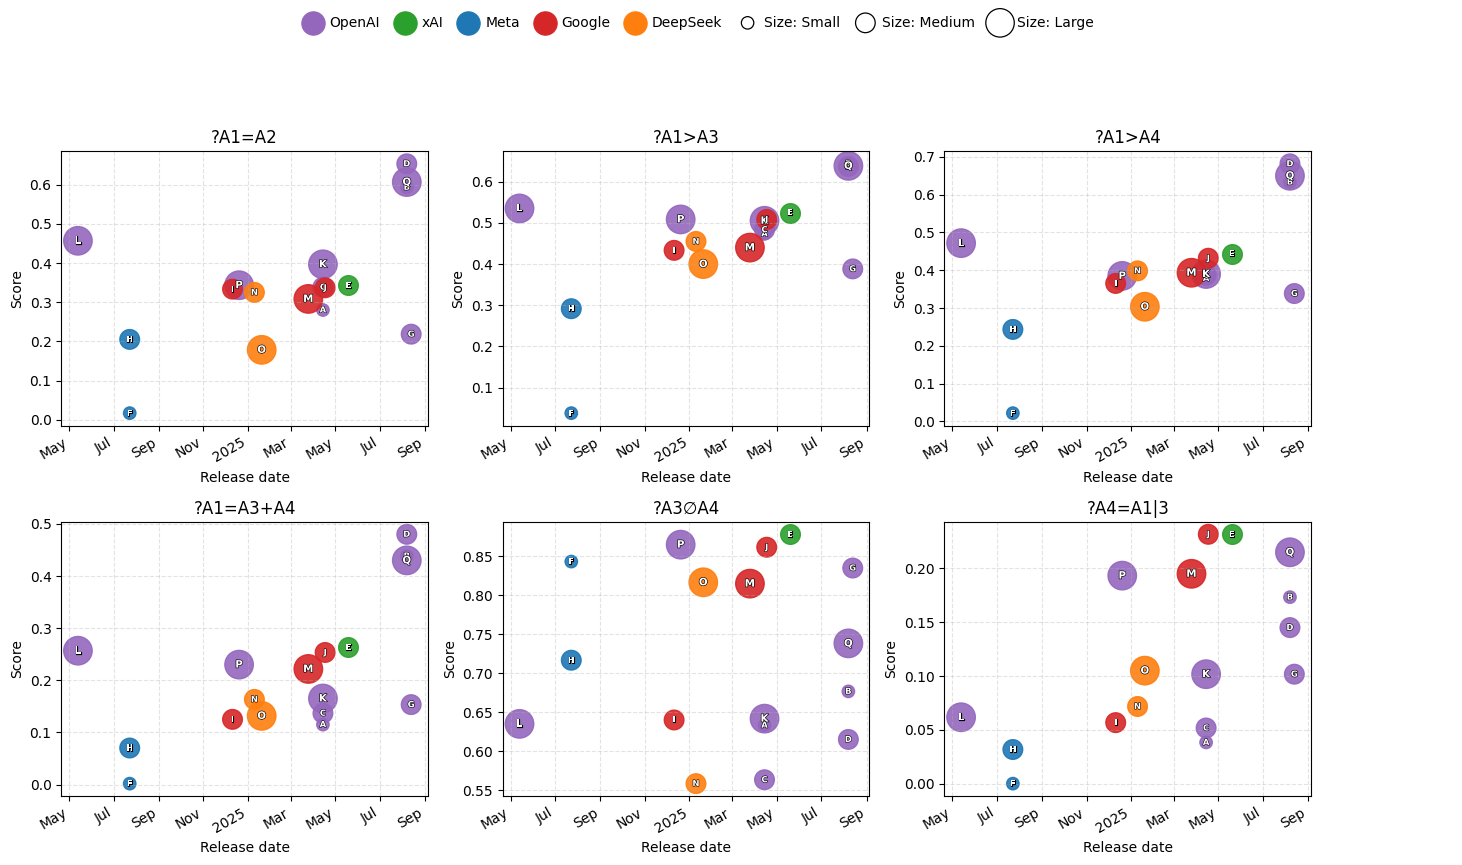

In [36]:
# predicates = ["p(A1=A2)", "p(A1=A3+A4)", "p(A1>A3)", "p(A1>A4)", "p(A3∅A4)", "p(A4=A1|3)"]
predicates = ["?A1=A2","?A1>A3","?A1>A4","?A1=A3+A4","?A3∅A4","?A4=A1|3"]

# Draw
fig, axes = draw_llm_bubble_grid(
    df=df_summery,
    predicates=predicates,
    llms=llms,
    dataset="overall",
    actions=["zero-shot"],
    llm_info = llm_info,
    ncols=3,
    figsize=(16, 9),
    date_format="%Y-%m-%d",
    title_prefix="",
    ylabel="Score",
)
plt.show()


In [33]:
from pathlib import Path
import itertools
import re
import matplotlib.pyplot as plt

def _slug(s: str) -> str:
    """Filesystem-safe slug."""
    return re.sub(r"[^A-Za-z0-9._+-]+", "_", str(s)).strip("_")

def save_all_bubble_grids(
    *,
    df,
    predicates,
    llms,
    bubble_sizes,
    release_dates,
    families=None,
    # If None, infer from df['dataset'].unique()
    datasets=None,
    # If None, create one action-set per unique action in df['action'].
    # You can also pass a list of lists, e.g. [["zero-shot"], ["fix-llm-response"], ["zero-shot","fix-llm-response"]]
    actions=None,
    include_all_actions=False,   # if True and action_sets is None, add one extra set with all actions
    outdir="plots",
    ncols=3,
    figsize=(16, 9),
    date_format="%Y-%m-%d",
    ylabel="Score",
    title_prefix="",
    dpi=200,
):
    """
    Save a bubble-grid plot for each (dataset, action-set).
    Returns a list of saved file paths.
    """
    outdir = Path(outdir)
    outdir.mkdir(parents=True, exist_ok=True)

    # Infer datasets
    if datasets is None:
        datasets = sorted(df["dataset"].dropna().unique().tolist())

    saved = []

    for ds in datasets:
        for act in actions:
           
            # Draw
            fig, axes = draw_llm_bubble_grid(
                df=df,
                predicates=predicates,
                llms=llms,
                dataset=ds,
                actions=[act],
                bubble_sizes=bubble_sizes,
                release_dates=release_dates,
                families=families,
                ncols=ncols,
                figsize=figsize,
                date_format=date_format,
                title_prefix=title_prefix,
                ylabel=ylabel,
            )

            folder = Path(outdir)
            folder.mkdir(parents=True, exist_ok=True) 
            fig.savefig(f"{folder}/{ds}_{act}.png", dpi=dpi, bbox_inches="tight")
            plt.close(fig)

            


In [321]:
actions = ["zero-shot", "wikidata", "fixing", "classification"]
datasets=["overall", "spinach", "qawiki","synthetic"]
predicates=["?A1=A2","?A1>A3","?A1>A4","?A1=A3+A4","?A3∅A4","?A4=A1|3"]
out_dir = config.get("out_dir")
paths = save_all_bubble_grids(
    df=df_summery,
    predicates=predicates,
    llms=llms,
    bubble_sizes=unknown_bucket_by_model,
    release_dates=llm_info,
    families=families,
    datasets=datasets,       # or None to infer from df
    actions=actions,
    outdir=f"{out_dir}/bubble_scatter",
    ncols=3,
    figsize=(16,9),
    ylabel="Score",
    title_prefix=""
)


In [322]:
actions = ["zero-shot", "wikidata", "fixing", "classification"]
datasets=["overall", "spinach", "qawiki","synthetic"]
# predicates=["?A1=A2","?A1>A3","?A1>A4","?A1=A3+A4","?A3∅A4","?A4=A1|3"]
# predicates=["p(A1=A2)","p(A1>A3)","p(A1>A4)","p(A1=A3+A4)","p(A3∅A4)","p(A4=A1|3)"]
predicates = ["J(A1-A2)","J(A1-A34)","J(A3-A4)","J(A4-A1|3)"]
out_dir = config.get("out_dir")
paths = save_all_bubble_grids(
    df=df_summery,
    predicates=predicates,
    llms=llms,
    bubble_sizes=unknown_bucket_by_model,
    release_dates=llm_info,
    families=families,
    datasets=datasets,       # or None to infer from df
    actions=actions,
    outdir=f"{out_dir}/bubble_scatter_jarccard",
    ncols=3,
    figsize=(16,9),
    ylabel="Score",
    title_prefix=""
)


# Relation Identification

confusion matrix of relation identification? 

# Detailed Analysis
1. A1-A1*: internal inconsistency
2. pos / neg analysis: effect of relation correct identified, leading to higher consistency? 

In [376]:
df_summery

,dataset,action,llm,?A1=A2,?A1=A3+A4,?A1>A3,?A1>A4,?A3∅A4,?A4=A1|3,?A1=A1*,...,?A1=A3+A4(-),J(1-34)+,J(1-34)-,p(A1=A2),p(A1=A3+A4),p(A1>A3),p(A1>A4),p(A3∅A4),p(A4=A1|3),llm_rank
0,qawiki,classification,deepseek-chat,0.9800,0.8467,0.9000,0.9333,0.5600,0.4533,0.5133,...,NaN,NaN,NaN,0.0000,0.0000,0.0000,0.0000,0.8313,0.0000,2
1,qawiki,classification,deepseek-reasoner,0.7267,0.8533,0.9133,0.8933,0.4533,0.3733,0.3867,...,NaN,NaN,NaN,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,3
2,qawiki,classification,gemini-2.0-flash,0.8667,0.8867,1.0000,0.9533,0.3533,0.2933,0.4667,...,1.000000,0.949498,1.000000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,5
3,qawiki,classification,gemini-2.5-flash,0.8933,0.9467,1.0000,0.9800,0.8267,0.7733,0.2600,...,0.500000,0.981066,0.922233,0.0000,0.0000,0.0000,0.0000,0.7388,0.0000,6
4,qawiki,classification,gemini-2.5-pro,0.9000,0.7200,1.0000,0.8467,0.8800,0.6200,0.3000,...,0.200000,0.862464,0.486910,0.0000,0.0000,0.0000,0.0000,0.0100,0.0000,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,overall,zero-shot,gpt-oss:20b,0.2400,0.1667,0.4244,0.3511,0.8267,0.1111,NaN,...,0.076923,0.428284,0.299196,0.5220,0.5251,0.5183,0.5194,0.5255,0.5304,13
262,overall,zero-shot,grok-3-mini,0.3667,0.2867,0.5533,0.4733,0.8867,0.2556,NaN,...,0.090909,0.614228,0.376955,0.5195,0.5211,0.5191,0.5191,0.5304,0.5215,4
263,overall,zero-shot,llama3.1:70b,0.2356,0.0756,0.3044,0.2600,0.7111,0.0400,NaN,...,0.142857,0.370641,0.466443,0.5227,0.5363,0.5205,0.5210,0.5205,0.5469,1
264,overall,zero-shot,llama3.1:8b,0.0200,0.0022,0.0622,0.0444,0.8267,0.0000,NaN,...,NaN,NaN,NaN,0.5660,0.6875,0.5390,0.5456,0.5238,1.0000,0


In [380]:
J_predicates

['J(A1-A2)', 'J(A1-A34)', 'J(A3-A4)', 'J(A4-A1|3)']

In [515]:
pos_predicate = ["?A1=A2(+)","?A1>A3(+)","?A3∅A4(+)","?A1=A3+A4(+)"]
neg_predicate = ["?A1=A2(-)","?A1>A3(-)","?A3∅A4(-)","?A1=A3+A4(-)"]
n_predicate = ['?A1=A2','?A1>A3','?A3∅A4','?A1=A3+A4']

pos_predicate_j = ["J(1-2)+","J(3-4)+","J(1-34)+"]
neg_predicate_j = ["J(1-2)-","J(3-4)-","J(1-34)-"]
J_predicate = ['J(A1-A2)', 'J(A3-A4)', 'J(A1-A34)']

df_summery[(df_summery["action"]=="zero-shot") & (df_summery["dataset"]=="overall")]

,dataset,action,llm,?A1=A2,?A1=A3+A4,?A1>A3,?A1>A4,?A3∅A4,?A4=A1|3,?A1=A1*,...,?A1=A3+A4(+),?A1=A3+A4(-),J(1-34)+,J(1-34)-,p(A1=A2),p(A1=A3+A4),p(A1>A3),p(A1>A4),p(A3∅A4),p(A4=A1|3)
249,overall,zero-shot,deepseek-chat,0.3311,0.1667,0.4644,0.4267,0.5800,0.0867,NaN,...,0.155718,0.282051,0.449316,0.511567,0.5208,0.5257,0.5188,0.5191,0.5195,0.5358
250,overall,zero-shot,deepseek-reasoner,0.1911,0.1400,0.4067,0.3133,0.8067,0.1156,NaN,...,0.161039,0.000000,0.444475,0.328867,0.5240,0.5269,0.5186,0.5201,0.5232,0.5294
251,overall,zero-shot,gemini-2.0-flash,0.3622,0.1356,0.4400,0.3822,0.6289,0.0556,NaN,...,0.127424,0.168539,0.477259,0.488336,0.5192,0.5279,0.5190,0.5200,0.5202,0.5406
252,overall,zero-shot,gemini-2.5-flash,0.3533,0.2844,0.5133,0.4733,0.8600,0.2600,NaN,...,0.288372,0.200000,0.564927,0.369030,0.5193,0.5212,0.5187,0.5184,0.5271,0.5217
253,overall,zero-shot,gemini-2.5-pro,0.3267,0.2356,0.4489,0.4022,0.8022,0.2089,NaN,...,0.243678,0.000000,0.586511,0.477867,0.5199,0.5221,0.5188,0.5184,0.5237,0.5230
254,overall,zero-shot,gpt-4.1-2025-04-14,0.4511,0.1911,0.5378,0.4333,0.6267,0.1178,NaN,...,0.190588,0.333333,0.577954,0.397933,0.5188,0.5233,0.5181,0.5184,0.5195,0.5279
255,overall,zero-shot,gpt-4.1-mini-2025-04-14,0.3889,0.1622,0.5200,0.4267,0.5244,0.0644,NaN,...,0.152074,0.437500,0.546715,0.652206,0.5195,0.5264,0.5193,0.5191,0.5188,0.5383
256,overall,zero-shot,gpt-4.1-nano-2025-04-14,0.3156,0.1178,0.5044,0.4089,0.6089,0.0400,NaN,...,NaN,0.117778,NaN,0.445422,0.5198,0.5285,0.5187,0.5194,0.5192,0.5469
257,overall,zero-shot,gpt-4o,0.4622,0.2556,0.5400,0.4711,0.6689,0.0778,NaN,...,0.249147,0.267516,0.574008,0.513255,0.5184,0.5211,0.5189,0.5189,0.5196,0.5347
258,overall,zero-shot,gpt-5,0.6222,0.4733,0.6667,0.6867,0.7222,0.2489,NaN,...,0.470588,0.520000,0.710102,0.679628,0.5190,0.5190,0.5199,0.5211,0.5203,0.5215


In [ ]:
import math
from typing import Sequence, Optional, Tuple
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.lines import Line2D


def plot_triplet_lines_for_predicates_explicit(
    df: pd.DataFrame,
    pos_predicates: Sequence[str],          # e.g. ["?A1=A2(+)","?A1>A3(+)","..."]
    neu_predicates: Sequence[str],          # e.g. ["?A1=A2","?A1>A3","..."]
    neg_predicates: Sequence[str],          # e.g. ["?A1=A2(-)","?A1>A3(-)","..."]
    *,
    star_predicates: Optional[Sequence[str]] = None,  # optional 4th line per subplot
    base_labels: Optional[Sequence[str]] = None,      # titles per subplot; defaults to neu_predicates
    dataset: str = "overall",
    actions: Sequence[str] = ("zero-shot",),
    llms: Optional[Sequence[str]] = None,
    aggregate: str = "mean",                # "mean" | "median"
    show_values: bool = False,              # annotate points only on first subplot
    ncols: int = 3,
    figsize: Tuple[int, int] = (16, 9),
    index_starts_at: int = 1,
    ylabel: str = "Value",
    colors: dict = None,                    # {'pos':'#...','neu':'#...','neg':'#...','star':'#...'}
    markers: dict = None,                   # {'pos':'o','neu':'s','neg':'D','star':'^'}
    ylim: Optional[Tuple[float, float]] = None,
) -> Tuple[plt.Figure, np.ndarray]:
    """
    Grid of line charts. For each predicate triplet (pos/neu/neg) — and optional 4th 'star' column —
    draw lines across the LLM index.

    df must contain: ['dataset','action','llm', ... predicate columns ...]
    """

    # ---- validation
    if not (len(pos_predicates) == len(neu_predicates) == len(neg_predicates)):
        raise ValueError("pos_predicates, neu_predicates, neg_predicates must have the same length.")
    if star_predicates is not None and len(star_predicates) != len(neu_predicates):
        raise ValueError("star_predicates must have the same length as the other predicate lists.")
    for cols in (pos_predicates, neu_predicates, neg_predicates):
        missing = [c for c in cols if c not in df.columns]
        if missing:
            raise KeyError(f"Missing columns in df: {missing}")
    if star_predicates is not None:
        missing = [c for c in star_predicates if c not in df.columns]
        if missing:
            raise KeyError(f"Missing columns in df (star_predicates): {missing}")

    # ---- setup
    if colors is None:
        colors = {'pos': '#4C78A8', 'neu': '#9E9E9E', 'neg': '#E45756', 'star': "#05F264"}
    if markers is None:
        markers = {'pos': 'o', 'neu': 's', 'neg': 'D', 'star': '^'}
    if base_labels is None:
        base_labels = list(neu_predicates)

    sub = df.copy()
    if "dataset" in sub.columns:
        sub = sub[sub["dataset"] == dataset]
    if "action" in sub.columns and actions is not None:
        sub = sub[sub["action"].isin(list(actions))]

    # infer llm order if not provided
    if llms is None:
        if "action" in df.columns and (df["action"] == "zero-shot").any():
            source = df[(df["dataset"] == dataset) & (df["action"] == "zero-shot")]
        else:
            source = df[df["dataset"] == dataset]
        seen = []
        for m in source["llm"].tolist():
            if m not in seen:
                seen.append(m)
        llms = seen or list(dict.fromkeys(df["llm"].tolist()))

    xs = list(range(index_starts_at, index_starts_at + len(llms)))

    # ---- figure/grid layout
    n = len(neu_predicates)
    nrows = 2 if n > 3 else 1
    ncols_eff = math.ceil(n / nrows)

    # Bottom index lines: up to 4 lines, 6 items per line
    per_line = 6
    max_lines = 4
    needed_lines = math.ceil(len(llms) / per_line) if len(llms) else 1
    n_index_lines = max(1, min(max_lines, needed_lines))
    bottom_band = {1: 0.30, 2: 0.40, 3: 0.50, 4: 0.60}.get(n_index_lines, 0.60)

    fig = plt.figure(figsize=figsize)
    gs = GridSpec(nrows + 1, ncols_eff, figure=fig, height_ratios=[1]*nrows + [bottom_band])

    axes = np.empty((nrows, ncols_eff), dtype=object)
    for r in range(nrows):
        for c in range(ncols_eff):
            axes[r, c] = fig.add_subplot(gs[r, c])
    axes_flat = axes.ravel()

    # ---- aggregation helper
    def agg_per_llm(colname: str):
        vals = []
        for m in llms:
            arr = pd.to_numeric(sub.loc[sub["llm"] == m, colname], errors="coerce").dropna()
            if arr.empty:
                vals.append(np.nan)
            else:
                vals.append(float(arr.median() if aggregate == "median" else arr.mean()))
        return vals

    # ---- plot each predicate group
    for i, (pcol, ncol, mcol, label) in enumerate(zip(pos_predicates, neu_predicates, neg_predicates, base_labels)):
        ax = axes_flat[i]

        y_pos = agg_per_llm(pcol)
        y_neu = agg_per_llm(ncol)
        y_neg = agg_per_llm(mcol)
        y_star = agg_per_llm(star_predicates[i]) if star_predicates is not None else None


        ax.plot(xs, y_pos, marker=markers['pos'], color=colors['pos'], label="(+)")
        ax.plot(xs, y_neu, marker=markers['neu'], color=colors['neu'], label="neutral")
        ax.plot(xs, y_neg, marker=markers['neg'], color=colors['neg'], label="(–)")
        if star_predicates is not None:
            ax.plot(xs, y_star, marker=markers['star'], color=colors['star'], label="(⋆)")

        if show_values and i == 0:
            def _annotate(vals, col):
                for x, y in zip(xs, vals):
                    if pd.notna(y):
                        ax.annotate(f"{y:.3f}", (x, y), xytext=(0, 6),
                                    textcoords="offset points", ha="center", fontsize=8, color=col)
            _annotate(y_pos, colors['pos'])
            _annotate(y_neu, colors['neu'])
            _annotate(y_neg, colors['neg'])
            if star_predicates is not None:
                _annotate(y_star, colors['star'])

        ax.set_xticks(xs)
        ax.set_xticklabels([str(i) for i in xs])
        ax.set_ylabel(ylabel)
        ax.set_title(label)
        ax.grid(True, axis="y", linestyle="--", alpha=0.35)
        if ylim is not None:
            ax.set_ylim(*ylim)

        if i == 0:
            proxies = [
                Line2D([], [], color=colors['pos'], marker=markers['pos'], linestyle='-'),
                Line2D([], [], color=colors['neu'], marker=markers['neu'], linestyle='-'),
                Line2D([], [], color=colors['neg'], marker=markers['neg'], linestyle='-'),
            ]
            labels_ = ["(+)", "neutral", "(–)"]
            if star_predicates is not None:
                proxies.append(Line2D([], [], color=colors['star'], marker=markers['star'], linestyle='-'))
                labels_.append("(⋆)")
            ax.legend(proxies, labels_, frameon=False, loc="best")

    # hide any unused axes
    for j in range(i + 1, len(axes_flat)):
        axes_flat[j].set_visible(False)

    # ---- bottom: dynamic LLM index band (up to 4 lines)
    legend_ax = fig.add_subplot(gs[nrows, :]); legend_ax.axis("off")

    def _format_index_lines(names, start_idx, per_line=6, max_lines=4):
        lines = []
        i0 = 0
        for _ in range(max_lines):
            chunk = names[i0:i0+per_line]
            if not chunk:
                break
            line = " | ".join(f"{idx:>2}: {nm}" for idx, nm in zip(range(start_idx+i0, start_idx+i0+len(chunk)), chunk))
            lines.append(line)
            i0 += per_line
        if i0 < len(names):  # not all shown
            remaining = len(names) - i0
            if lines:
                lines[-1] += f"  … (+{remaining} more)"
        return lines

    llm_names = list(llms)
    lines = _format_index_lines(llm_names, start_idx=index_starts_at, per_line=per_line, max_lines=max_lines)
    n_lines = max(1, len(lines))
    # positions from top (0.85) to bottom (0.15) within the band
    ys = np.linspace(0.80, 0.15, num=n_lines)

    # font size based on how dense we go
    tick_fs = 12 if (nrows == 1 and n_lines <= 2) else 10 if n_lines <= 3 else 9
    for y, line in zip(ys, lines):
        legend_ax.text(0.5, y, line, ha="center", va="center",
                       family="monospace", fontsize=tick_fs)

    # ---- layout
    action_str = actions[0] if isinstance(actions, (list, tuple)) and actions else str(actions)
    fig.subplots_adjust(left=0.06, right=0.985, top=0.92, bottom=0.05)
    fig.suptitle(f"LLMs consistency ({dataset} | {action_str})", fontsize=14, y=0.99)
    return fig, axes



None
None
None
None


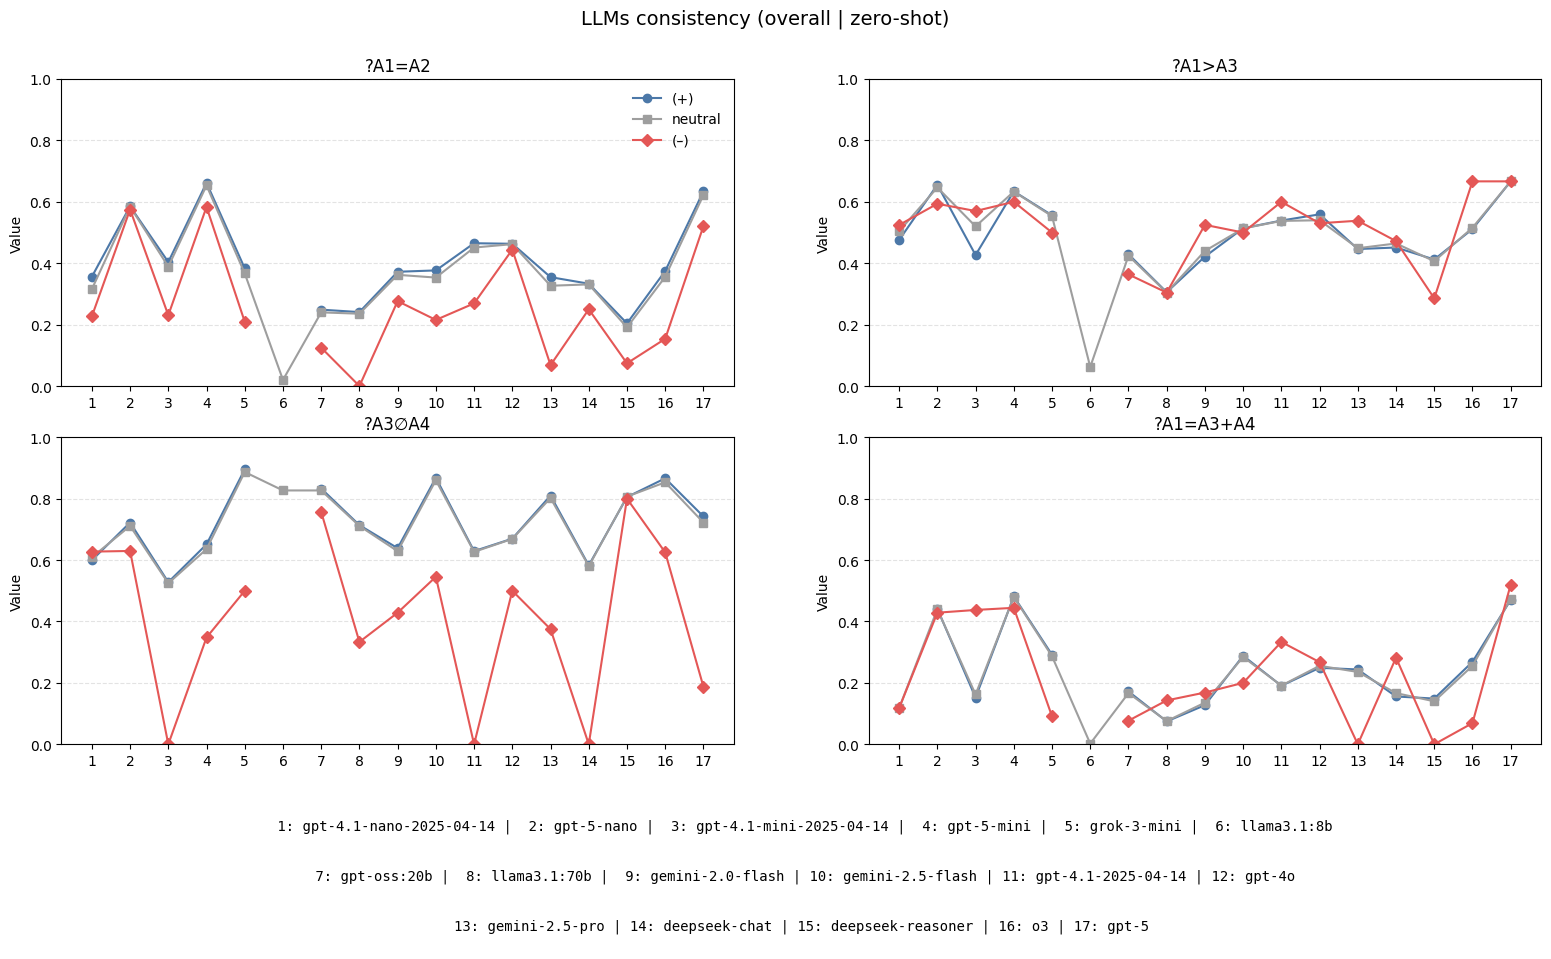

In [518]:
pos_cols = ["?A1=A2(+)","?A1>A3(+)","?A3∅A4(+)","?A1=A3+A4(+)"]
neu_cols = ['?A1=A2','?A1>A3','?A3∅A4','?A1=A3+A4']
neg_cols = ["?A1=A2(-)","?A1>A3(-)","?A3∅A4(-)","?A1=A3+A4(-)"]
labels   = ['?A1=A2','?A1>A3','?A3∅A4','?A1=A3+A4']

fig, axes = plot_triplet_lines_for_predicates_explicit(
    df=df_summery,
    pos_predicates=pos_cols,
    neu_predicates=neu_cols,
    neg_predicates=neg_cols,
    base_labels=labels,
    dataset="overall",
    actions=["zero-shot"],
    llms=llms,              # your preferred LLM order
    ncols=2,                # 2×2 for 4 predicates
    figsize=(16, 10),
    show_values=False,
    ylim=(0,1)              # optional
)
plt.show()


None
None
None


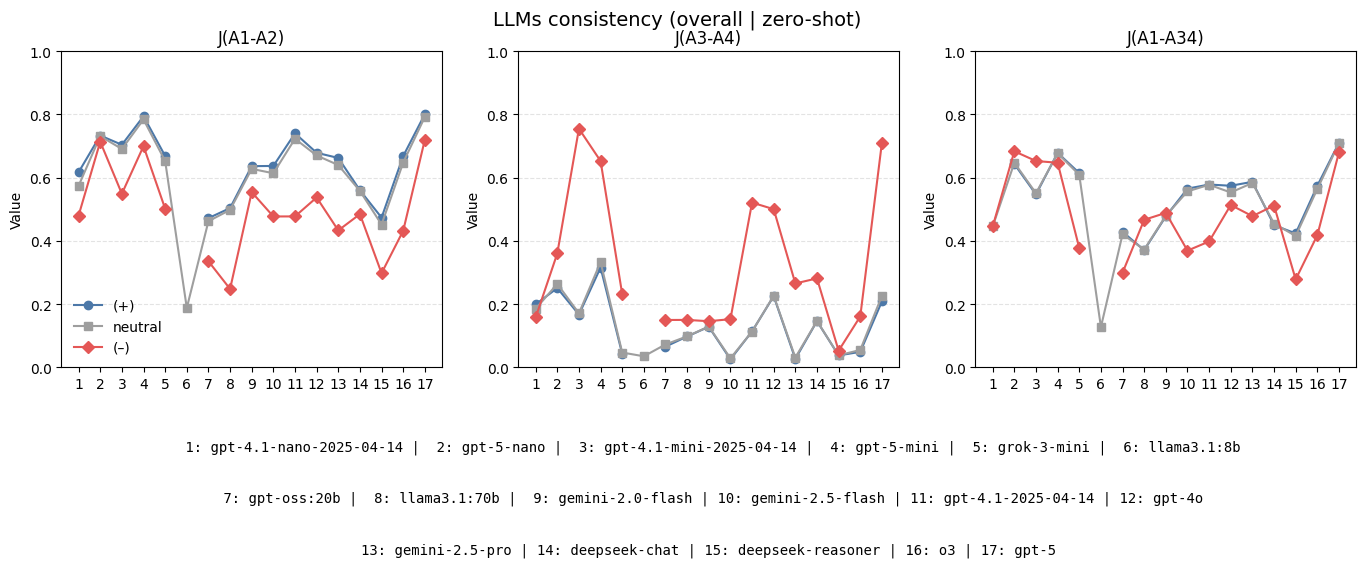

In [519]:
pos_predicate_j = ["J(1-2)+","J(3-4)+","J(1-34)+"]
neg_predicate_j = ["J(1-2)-","J(3-4)-","J(1-34)-"]
J_predicate = ['J(A1-A2)', 'J(A3-A4)', 'J(A1-A34)']

pos_cols = pos_predicate_j
neu_cols = J_predicate
neg_cols = neg_predicate_j
labels   = J_predicate

fig, axes = plot_triplet_lines_for_predicates_explicit(
    df=df_summery,
    pos_predicates=pos_cols,
    neu_predicates=neu_cols,
    neg_predicates=neg_cols,
    base_labels=labels,
    dataset="overall",
    actions=["zero-shot"],
    llms=llms,              # your preferred LLM order
    ncols=2,                # 2×2 for 4 predicates
    figsize=(14, 6),
    show_values=False,
    ylim=(0,1)              # optional
)
plt.show()


[0.9556, 0.0956, 0.36, 0.5711, 0.4044, 0.0556, 0.2933, 0.2156, 0.4578, 0.3644, 0.3244, 0.6667, 0.3978, 0.5289, 0.4, 0.3533, 0.5822]
[0.9556, 0.102, 0.6112, 0.7256, 0.6463, 0.3236, 0.5147, 0.5129, 0.6762, 0.646, 0.6525, 0.3254, 0.6568, 0.7226, 0.5863, 0.6311, 0.7731]


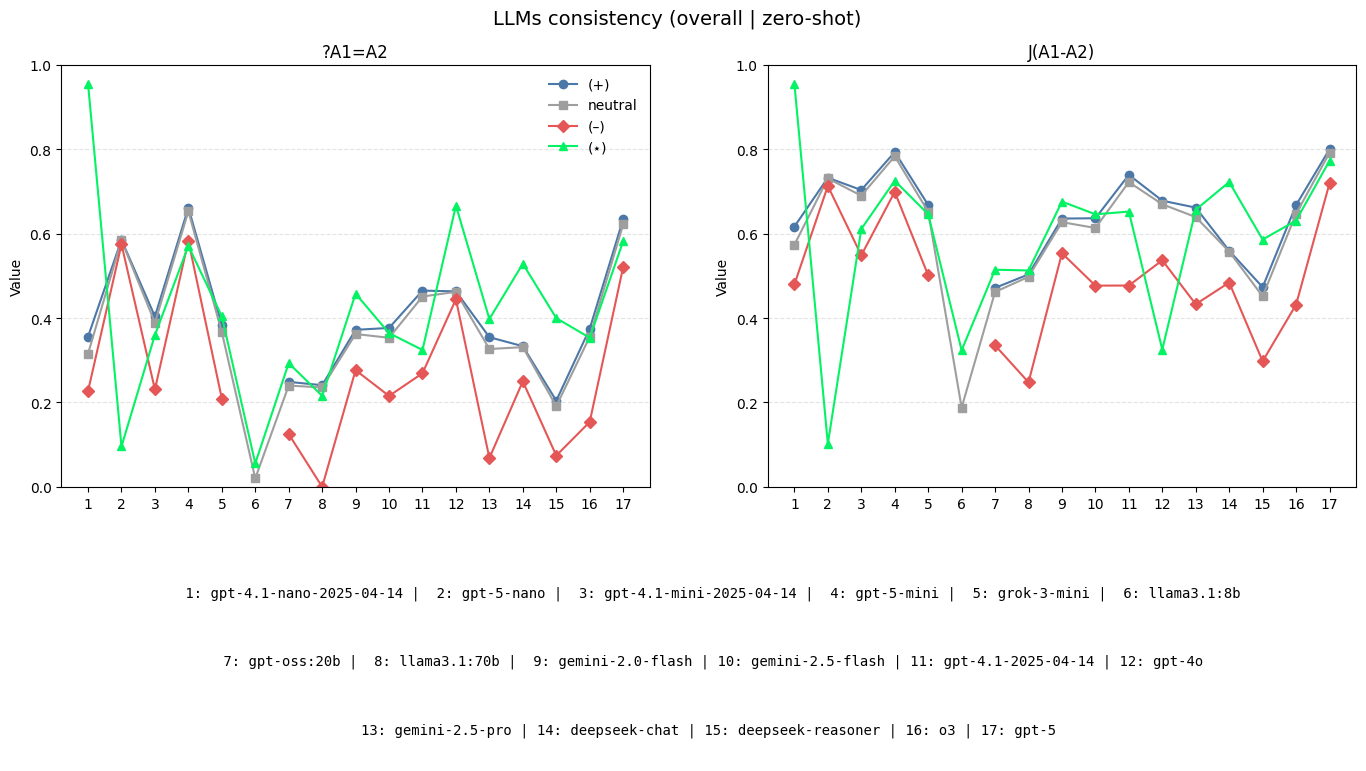

In [520]:
pos_predicate= ["?A1=A2(+)", "J(1-2)+"]
neg_predicate = ["?A1=A2(-)", "J(1-2)-"]
predicate = ["?A1=A2", 'J(A1-A2)']
predicate_star = ["?A1=A1*","J(A1-A1*)"]

pos_cols = pos_predicate
neu_cols = predicate
neg_cols = neg_predicate
labels   = predicate

fig, axes = plot_triplet_lines_for_predicates_explicit(
    df=df_summery,
    pos_predicates=pos_cols,
    neu_predicates=neu_cols,
    neg_predicates=neg_cols,
    base_labels=labels,
    star_predicates = predicate_star,
    dataset="overall",
    actions=["zero-shot"],
    llms=llms,              # your preferred LLM order
    ncols=2,                # 2×2 for 4 predicates
    figsize=(14, 8),
    show_values=False,
    ylim=(0,1)              # optional
)
plt.show()


In [476]:
from pathlib import Path
import re
import matplotlib.pyplot as plt

def _slug(s: str) -> str:
    """Filesystem-safe slug."""
    return re.sub(r"[^A-Za-z0-9._+-]+", "_", str(s)).strip("_")

def save_triplet_plots_for_all_datasets(
    *,
    df,
    pos_predicates,
    neu_predicates,
    neg_predicates,
    base_labels=None,
    actions=("classification",),
    llms=None,
    ncols=2,
    figsize=(14, 8),
    show_values=False,
    ylim=(0, 1),
    out_dir="plots/triplet_lines",
    dpi=200
):
    """
    For every dataset in df['dataset'], draw the triplet-lines grid and save as PNG.
    Returns a list of saved file paths.
    """
    out_path = Path(out_dir)
    out_path.mkdir(parents=True, exist_ok=True)

    datasets = sorted(df["dataset"].dropna().unique().tolist())
    saved = []

    for ds in datasets:
        fig, axes = plot_triplet_lines_for_predicates_explicit(
            df=df,
            pos_predicates=pos_predicates,
            neu_predicates=neu_predicates,
            neg_predicates=neg_predicates,
            base_labels=base_labels,
            dataset=ds,
            actions=list(actions),
            llms=llms,
            ncols=ncols,
            figsize=figsize,
            show_values=show_values,
            ylim=ylim,
        )
        # fig.suptitle(f"Dataset: {ds}", fontsize=14, y=0.995)

        fname = f"pos-neg-{_slug(ds)}_{actions[0]}.png"
        fpath = out_path / fname
        fig.savefig(fpath, dpi=dpi, bbox_inches="tight")
        plt.close(fig)
        saved.append(str(fpath))

    return saved


In [477]:

paths = save_triplet_plots_for_all_datasets(
    df=df_summery,
    pos_predicates=["?A1=A2(+)","?A1>A3(+)","?A3∅A4(+)","?A1=A3+A4(+)"],
    neu_predicates=['?A1=A2','?A1>A3','?A3∅A4','?A1=A3+A4'],
    neg_predicates=["?A1=A2(-)","?A1>A3(-)","?A3∅A4(-)","?A1=A3+A4(-)"],
    base_labels=['?A1=A2','?A1>A3','?A3∅A4','?A1=A3+A4'],
    actions=["classification"],
    llms=llms,
    ncols=2,
    figsize=(14, 8),
    show_values=False,
    ylim=(0,1),
    out_dir=f"{out_dir}/pos_neg"
)
print("\n".join(paths))


/Users/xianhaoliu/Library/CloudStorage/OneDrive-Stibo/Project/ISWS/ISWS-RP/new_charts/pos_neg/pos-neg-overall_classification.png
/Users/xianhaoliu/Library/CloudStorage/OneDrive-Stibo/Project/ISWS/ISWS-RP/new_charts/pos_neg/pos-neg-qawiki_classification.png
/Users/xianhaoliu/Library/CloudStorage/OneDrive-Stibo/Project/ISWS/ISWS-RP/new_charts/pos_neg/pos-neg-spinach_classification.png
/Users/xianhaoliu/Library/CloudStorage/OneDrive-Stibo/Project/ISWS/ISWS-RP/new_charts/pos_neg/pos-neg-synthetic_classification.png


In [478]:
pos_predicate_j = ["J(1-2)+","J(3-4)+","J(1-34)+"]
neg_predicate_j = ["J(1-2)-","J(3-4)-","J(1-34)-"]
J_predicate     = ['J(A1-A2)', 'J(A3-A4)', 'J(A1-A34)']

paths_j = save_triplet_plots_for_all_datasets(
    df=df_summery,
    pos_predicates=pos_predicate_j,
    neu_predicates=J_predicate,
    neg_predicates=neg_predicate_j,
    base_labels=J_predicate,
    actions=["classification"],
    llms=llms,
    ncols=2,
    figsize=(14, 8),
    show_values=False,
    ylim=(0, 1),
    out_dir=f"{out_dir}/pos_neg_j"
)
print("\n".join(paths_j))


/Users/xianhaoliu/Library/CloudStorage/OneDrive-Stibo/Project/ISWS/ISWS-RP/new_charts/pos_neg_j/pos-neg-overall_classification.png
/Users/xianhaoliu/Library/CloudStorage/OneDrive-Stibo/Project/ISWS/ISWS-RP/new_charts/pos_neg_j/pos-neg-qawiki_classification.png
/Users/xianhaoliu/Library/CloudStorage/OneDrive-Stibo/Project/ISWS/ISWS-RP/new_charts/pos_neg_j/pos-neg-spinach_classification.png
/Users/xianhaoliu/Library/CloudStorage/OneDrive-Stibo/Project/ISWS/ISWS-RP/new_charts/pos_neg_j/pos-neg-synthetic_classification.png


In [479]:

paths = save_triplet_plots_for_all_datasets(
    df=df_summery,
    pos_predicates=["?A1=A2(+)","?A1>A3(+)","?A3∅A4(+)","?A1=A3+A4(+)"],
    neu_predicates=['?A1=A2','?A1>A3','?A3∅A4','?A1=A3+A4'],
    neg_predicates=["?A1=A2(-)","?A1>A3(-)","?A3∅A4(-)","?A1=A3+A4(-)"],
    base_labels=['?A1=A2','?A1>A3','?A3∅A4','?A1=A3+A4'],
    actions=["zero-shot"],
    llms=llms,
    ncols=2,
    figsize=(14, 8),
    show_values=False,
    ylim=(0,1),
    out_dir=f"{out_dir}/pos_neg"
)
print("\n".join(paths))


/Users/xianhaoliu/Library/CloudStorage/OneDrive-Stibo/Project/ISWS/ISWS-RP/new_charts/pos_neg/pos-neg-overall_zero-shot.png
/Users/xianhaoliu/Library/CloudStorage/OneDrive-Stibo/Project/ISWS/ISWS-RP/new_charts/pos_neg/pos-neg-qawiki_zero-shot.png
/Users/xianhaoliu/Library/CloudStorage/OneDrive-Stibo/Project/ISWS/ISWS-RP/new_charts/pos_neg/pos-neg-spinach_zero-shot.png
/Users/xianhaoliu/Library/CloudStorage/OneDrive-Stibo/Project/ISWS/ISWS-RP/new_charts/pos_neg/pos-neg-synthetic_zero-shot.png


In [480]:
pos_predicate_j = ["J(1-2)+","J(3-4)+","J(1-34)+"]
neg_predicate_j = ["J(1-2)-","J(3-4)-","J(1-34)-"]
J_predicate     = ['J(A1-A2)', 'J(A3-A4)', 'J(A1-A34)']

paths_j = save_triplet_plots_for_all_datasets(
    df=df_summery,
    pos_predicates=pos_predicate_j,
    neu_predicates=J_predicate,
    neg_predicates=neg_predicate_j,
    base_labels=J_predicate,
    actions=["zero-shot"],
    llms=llms,
    ncols=2,
    figsize=(14, 8),
    show_values=False,
    ylim=(0, 1),
    out_dir=f"{out_dir}/pos_neg_j"
)
print("\n".join(paths_j))


/Users/xianhaoliu/Library/CloudStorage/OneDrive-Stibo/Project/ISWS/ISWS-RP/new_charts/pos_neg_j/pos-neg-overall_zero-shot.png
/Users/xianhaoliu/Library/CloudStorage/OneDrive-Stibo/Project/ISWS/ISWS-RP/new_charts/pos_neg_j/pos-neg-qawiki_zero-shot.png
/Users/xianhaoliu/Library/CloudStorage/OneDrive-Stibo/Project/ISWS/ISWS-RP/new_charts/pos_neg_j/pos-neg-spinach_zero-shot.png
/Users/xianhaoliu/Library/CloudStorage/OneDrive-Stibo/Project/ISWS/ISWS-RP/new_charts/pos_neg_j/pos-neg-synthetic_zero-shot.png
